# Housing : Price Prediction

### Import Libraries

In [1]:
# Scientific computing packages
import pandas as pd
import numpy as np
import scipy.stats as stats

# Visualization packages
import matplotlib.pyplot as plt
import seaborn as sns

#datetime package
import datetime as dt
import time

# Import warnings
import warnings
warnings.filterwarnings('ignore')

### Import Dataset

In [2]:
df=pd.read_csv('C:/Users/Lenovo-PC/Desktop/Internship/Assignment_09_HousingProject/Project-Housing_splitted/train.csv')
df.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0  127         120       RL          NaN     4928   Pave   NaN      IR1   
1  889          20       RL         95.0    15865   Pave   NaN      IR1   
2  793          60       RL         92.0     9920   Pave   NaN      IR1   
3  110          20       RL        105.0    11751   Pave   NaN      IR1   
4  422          20       RL          NaN    16635   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC  Fence MiscFeature MiscVal  \
0         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
2         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
3         Lvl    AllPub  ...        0    NaN  MnPrv         NaN       0   
4         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   

  MoSold YrSold  SaleType  SaleCondition  SalePrice  
0      2   2007        WD         Normal     128000  
1     10   2007        WD         Normal     268000  
2      6   2007        WD         Normal     269790  
3      1   2010       COD         Normal     190000  
4      6   2009        WD         Normal     215000  

[5 rows x 81 columns]

Dataset is having both numeric and categorical type columns. Also we can see there are null and invalid values in the dataset that needs to be treated.

### Project Description

Houses are one of the necessary need of each and every person around the globe and therefore housing and real estate market is one of the markets which is one of the major contributors in the world’s economy. It is a very large market and there are various companies working in the domain. Data science comes as a very important tool to solve problems in the domain to help the companies increase their overall revenue, profits, improving their marketing strategies and focusing on changing trends in house sales and purchases. Predictive modelling, Market mix modelling, recommendation systems are some of the machine learning techniques used for achieving the business goals for housing companies.

A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses 
data analytics to purchase houses at a price below their actual values and flip them at a higher price. For the same 
purpose, the company has collected a data set from the sale of houses in Australia.

The company is looking at prospective properties to buy houses to enter the market. We are required to build a model 
using Machine Learning in order to predict the actual value of the prospective properties and decide whether to invest 
in them or not. For this company wants to know:

• Which variables are important to predict the price of variable?

• How do these variables describe the price of the house?

In [3]:
#Checking the dataset shape
df.shape

(1168, 81)

Dataset is having 1168 rows and 81 columns (80 input features and 1 output feature).

In [4]:
# Checking columns
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

Columns names are displayed where 'SalePrice' is the target variable and all other are independent variables.

In [5]:
# Checking datatypes
df.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object

Here, columns are of numeric and object types. Target variable is of continuous type.

In [6]:
# Checking dataset schema
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1168 entries, 0 to 1167
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1168 non-null   int64  
 1   MSSubClass     1168 non-null   int64  
 2   MSZoning       1168 non-null   object 
 3   LotFrontage    954 non-null    float64
 4   LotArea        1168 non-null   int64  
 5   Street         1168 non-null   object 
 6   Alley          77 non-null     object 
 7   LotShape       1168 non-null   object 
 8   LandContour    1168 non-null   object 
 9   Utilities      1168 non-null   object 
 10  LotConfig      1168 non-null   object 
 11  LandSlope      1168 non-null   object 
 12  Neighborhood   1168 non-null   object 
 13  Condition1     1168 non-null   object 
 14  Condition2     1168 non-null   object 
 15  BldgType       1168 non-null   object 
 16  HouseStyle     1168 non-null   object 
 17  OverallQual    1168 non-null   int64  
 18  OverallC

It gives additional information regarding the dataset like RangeIndex, Data columns, datatypes. 

We can see there are null values in the dataset. Columns 'PoolQC', 'Fence', 'MiscFeature' are having None in more than half of the data, hence these could not contribute well in model learning. 

Column 'GarageYrBlt' is having year values but in float format so datatype conversion is required here.

### Data Preprocessing

In [7]:
# Dropping columns having nulls in more than half of data
df.drop(columns=['PoolQC', 'Fence', 'MiscFeature'], axis=1, inplace=True)
df.shape

(1168, 78)

In [8]:
# Checking which all column values are relevant for model training
for i in df.columns :
    print(i,' : ', df[i].dtypes)
    print('Unique values : ',df[i].nunique())
    print('Value counts  : ',df[i].value_counts(dropna=False))
    print('----------------------')

Id  :  int64
Unique values :  1168
Value counts  :  127     1
1391    1
1389    1
448     1
1179    1
       ..
1402    1
661     1
101     1
415     1
617     1
Name: Id, Length: 1168, dtype: int64
----------------------
MSSubClass  :  int64
Unique values :  15
Value counts  :  20     428
60     244
50     113
120     69
70      53
30      52
160     47
80      43
90      41
190     26
85      19
75      14
45      10
180      6
40       3
Name: MSSubClass, dtype: int64
----------------------
MSZoning  :  object
Unique values :  5
Value counts  :  RL         928
RM         163
FV          52
RH          16
C (all)      9
Name: MSZoning, dtype: int64
----------------------
LotFrontage  :  float64
Unique values :  106
Value counts  :  NaN      214
60.0     111
80.0      60
70.0      58
75.0      46
        ... 
128.0      1
152.0      1
149.0      1
112.0      1
153.0      1
Name: LotFrontage, Length: 107, dtype: int64
----------------------
LotArea  :  int64
Unique values :  892
Value 

We have checked number of unique values in all the columns. 'Id' column has just unique values in all 1168 records. Column 'Alley' has 1091 NA values which means No alley access hence it needs to be replaced. Column 'MasVnrType' is having more than half of total rows having Masonry veneer type as None. 'Utilities' column has just 1 value i.e. 'AllPub' in all 1168 data records. Column 'MasVnrArea' has more than half records with Masonry veneer area in square feet as 0.0 which is an invalid value. Column 'PoolArea' s having majority of values as 0 and a few other values with just 1-1 counts, hence irrelevant.

Therefore, these columns will not contribute much in model learning.

In [9]:
# Dropping the irrelevant columns
df.drop(['Id','MasVnrType','MasVnrArea','Utilities','PoolArea'],axis=1,inplace=True)
df.head()

MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0         120       RL          NaN     4928   Pave   NaN      IR1   
1          20       RL         95.0    15865   Pave   NaN      IR1   
2          60       RL         92.0     9920   Pave   NaN      IR1   
3          20       RL        105.0    11751   Pave   NaN      IR1   
4          20       RL          NaN    16635   Pave   NaN      IR1   

  LandContour LotConfig LandSlope  ... OpenPorchSF EnclosedPorch 3SsnPorch  \
0         Lvl    Inside       Gtl  ...         205             0         0   
1         Lvl    Inside       Mod  ...         207             0         0   
2         Lvl   CulDSac       Gtl  ...         130             0         0   
3         Lvl    Inside       Gtl  ...         122             0         0   
4         Lvl       FR2       Gtl  ...           0             0         0   

  ScreenPorch MiscVal  MoSold  YrSold  SaleType  SaleCondition SalePrice  
0           0       0       2    2007        WD         Normal    128000  
1         224       0      10    2007        WD         Normal    268000  
2           0       0       6    2007        WD         Normal    269790  
3           0       0       1    2010       COD         Normal    190000  
4           0       0       6    2009        WD         Normal    215000  

[5 rows x 73 columns]

Dropped the irrelevant columns and proceeding for further analysis.

In [10]:
# Checking the null values
df.isnull().sum()[:30]

MSSubClass         0
MSZoning           0
LotFrontage      214
LotArea            0
Street             0
Alley           1091
LotShape           0
LandContour        0
LotConfig          0
LandSlope          0
Neighborhood       0
Condition1         0
Condition2         0
BldgType           0
HouseStyle         0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
RoofStyle          0
RoofMatl           0
Exterior1st        0
Exterior2nd        0
ExterQual          0
ExterCond          0
Foundation         0
BsmtQual          30
BsmtCond          30
BsmtExposure      31
BsmtFinType1      30
dtype: int64

There are null values in the dataset columns 'LotFrontage', 'Alley', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond', . 'Alley' as NA means No alley access, hence ir needs to be replaced with some other value.

In [11]:
# Checking for null values in the dataset columns
df[(df['GarageQual'].isna())&(df['GarageCond'].isna())].head()

MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
48           20       RL         50.0     5000   Pave   NaN      Reg   
72          190       RM         60.0     6780   Pave   NaN      Reg   
74           30       RH         70.0     4270   Pave   NaN      Reg   
105          20       RL         70.0    10500   Pave   NaN      Reg   
116          20       RL         63.0     7500   Pave   NaN      Reg   

    LandContour LotConfig LandSlope  ... OpenPorchSF EnclosedPorch 3SsnPorch  \
48          Low    Inside       Mod  ...           0             0         0   
72          Lvl    Inside       Gtl  ...           0             0         0   
74          Bnk    Inside       Mod  ...           0           286         0   
105         Lvl       FR2       Gtl  ...           0             0         0   
116         Lvl    Inside       Gtl  ...           0             0         0   

    ScreenPorch MiscVal  MoSold  YrSold  SaleType  SaleCondition SalePrice  
48            0       0       1    2007        WD         Normal     39300  
72            0       0       6    2006        WD         Normal     84500  
74            0       0       5    2007        WD         Normal     79000  
105           0       0       4    2010     ConLI         Normal    115000  
116           0       0       4    2008        WD         Normal    141000  

[5 rows x 73 columns]

There are 64 rows of both te columns GarageQual and GarageCond which are null.

In [12]:
# Checking skewness in numeric columns for replacing nulls
null_cols=['LotFrontage', 'Alley', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'FireplaceQu',
            'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond']
    
for i in null_cols :
    if df[i].dtypes!='object' :
        print(i,' ',df[i].skew())

LotFrontage   2.4502410142609246
GarageYrBlt   -0.6445640197769343


Data seems skewed in columns hence using median value to replace nulls is preferred.

In [13]:
# Checking for the values to replace with in columns
print(df['LotFrontage'].median())
print(df['GarageYrBlt'].median())

70.0
1980.0


In [14]:
# Treating nulls by replacing/filling values
df['LotFrontage'].fillna(df['LotFrontage'].median(),inplace=True)
df['Alley'].fillna('No access',inplace=True)
df['BsmtQual'].fillna('No Basement',inplace=True)
df['BsmtCond'].fillna('No Basement',inplace=True)
df['BsmtExposure'].fillna('No Basement',inplace=True)
df['BsmtFinType1'].fillna('No Basement',inplace=True)
df['BsmtFinType2'].fillna('No Basement',inplace=True)
df['FireplaceQu'].fillna('No Fireplace',inplace=True)
df['GarageType'].fillna('No Garage',inplace=True)
df['GarageYrBlt'].fillna(df['GarageYrBlt'].median(),inplace=True)
df['GarageFinish'].fillna('No Garage',inplace=True)
df['GarageQual'].fillna('No Garage',inplace=True)
df['GarageCond'].fillna('No Garage',inplace=True)
# Checking nulls
df.isnull().sum().any()

False

There are no more null values in the dataset.

In [15]:
# Checking for the duplicates in the dataset
df[df.duplicated()].count().sum()

0

There are no duplicate values in the dataset.

In [16]:
# Datatype conversion on 'GarageYrBlt' column
df['GarageYrBlt']=df['GarageYrBlt'].astype('int64')
df['GarageYrBlt'].dtypes

dtype('int64')

In [17]:
# Checking shape of new dataset
df.shape

(1168, 73)

Dataset is now having  1168 rows and 73 columns.

### EDA and Visualizations

<AxesSubplot:>

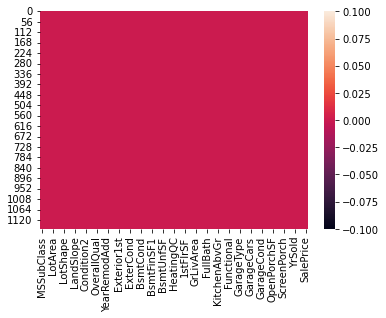

In [18]:
# Visualizing nulls
sns.heatmap(df.isnull())

Heatmap showing 0 null values in the dataset.

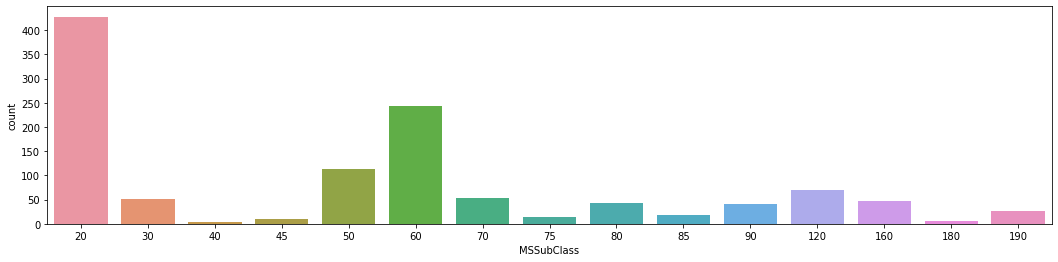

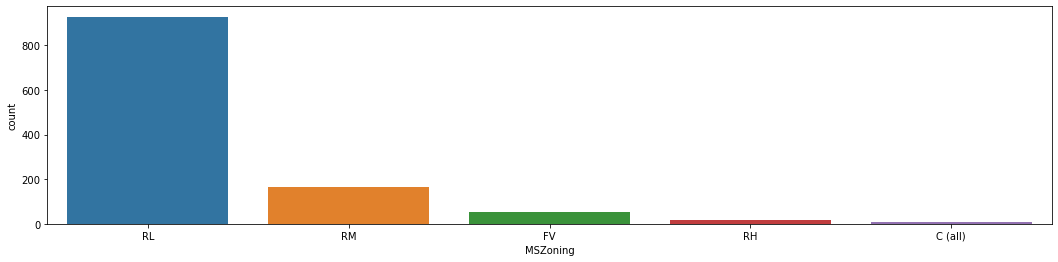

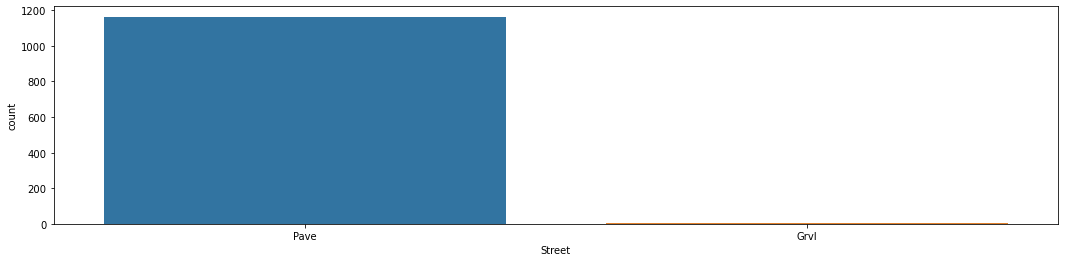

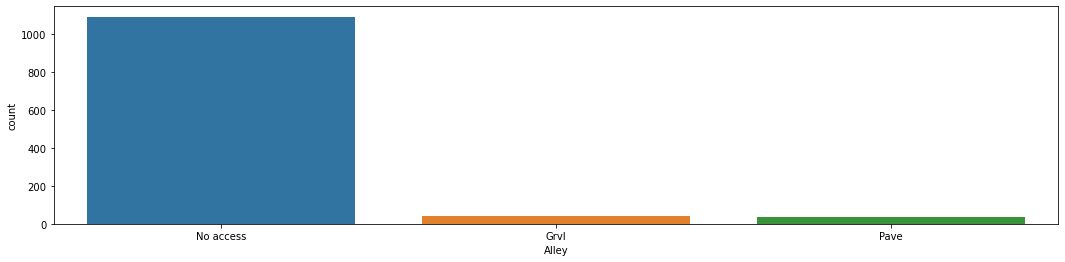

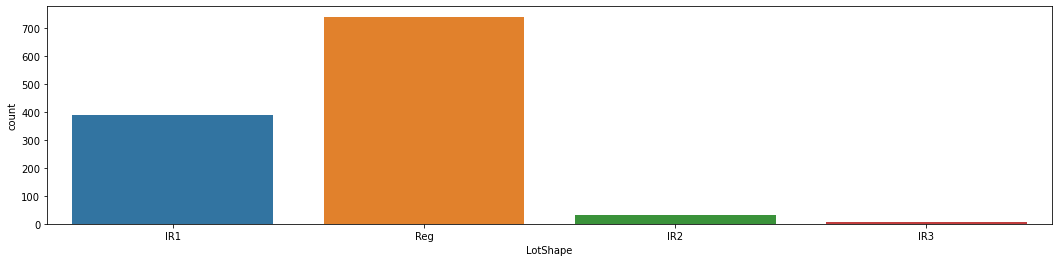

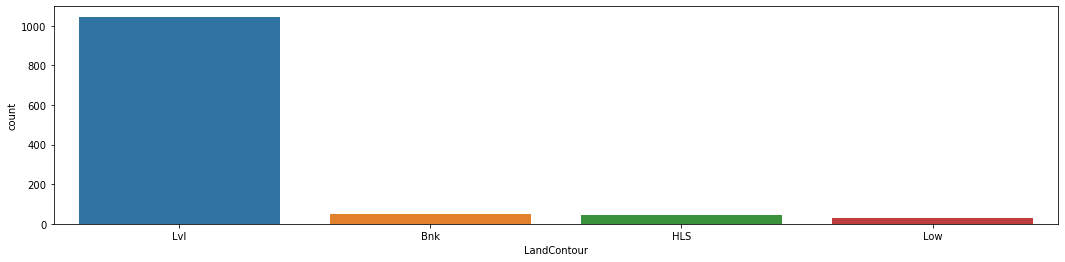

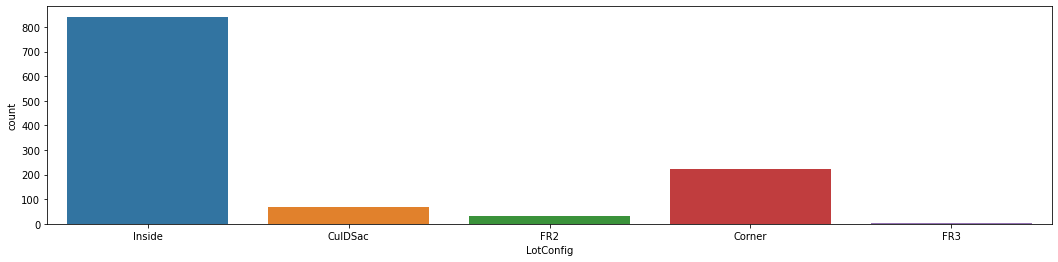

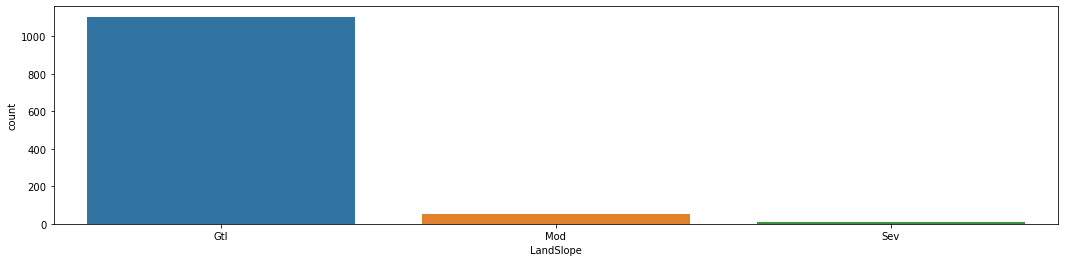

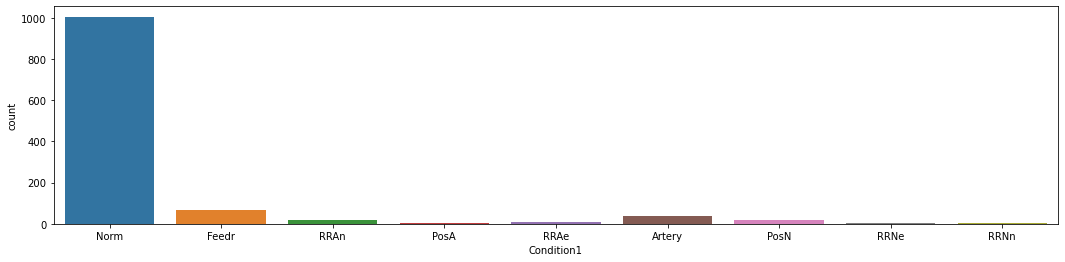

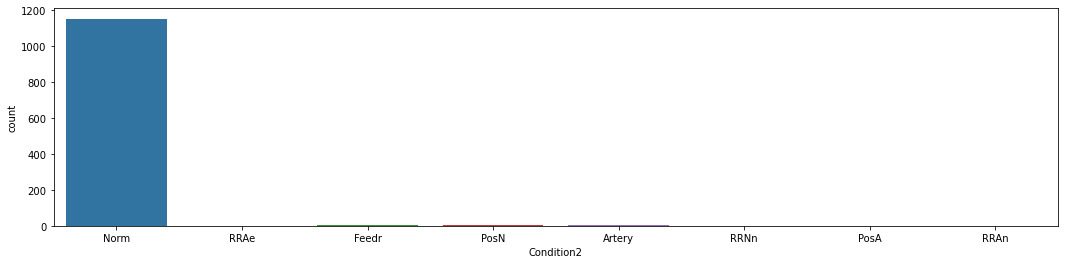

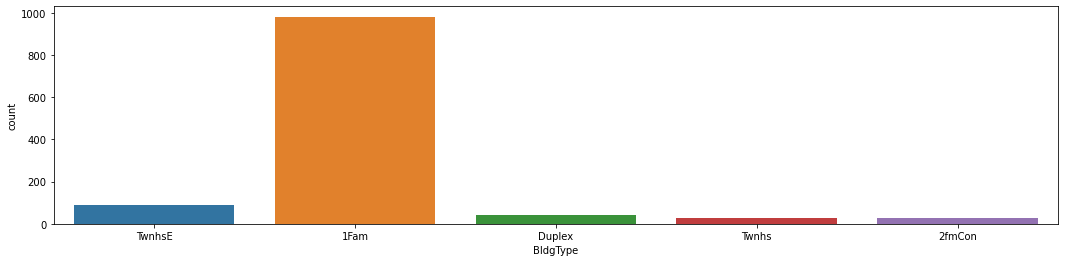

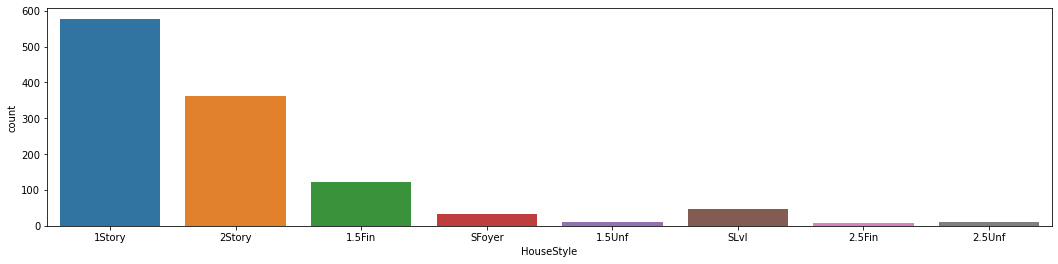

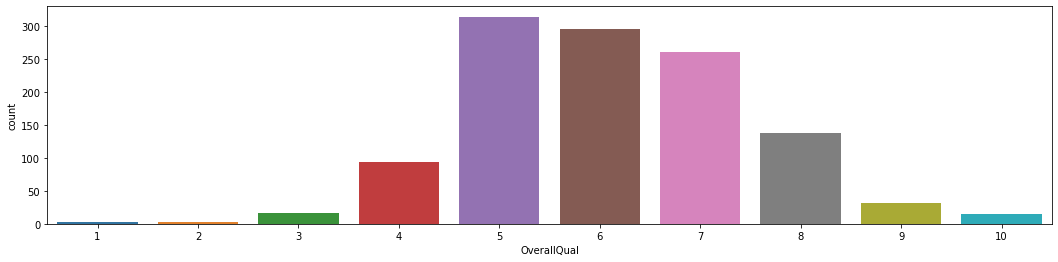

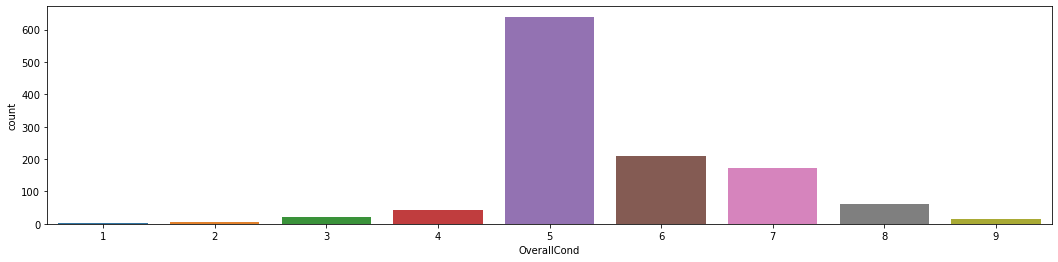

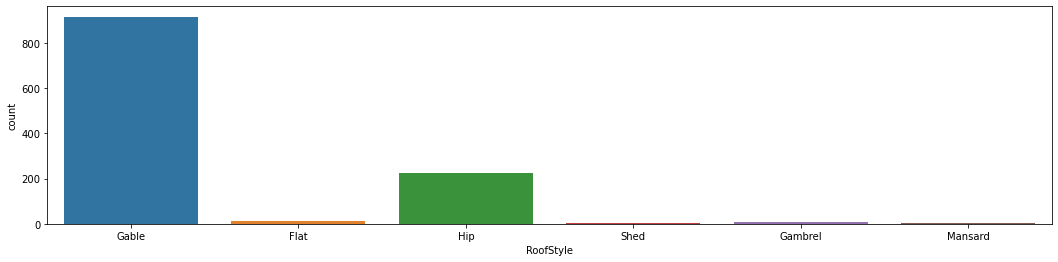

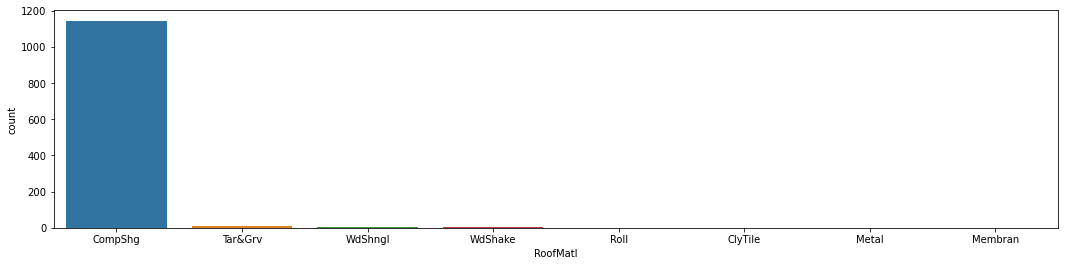

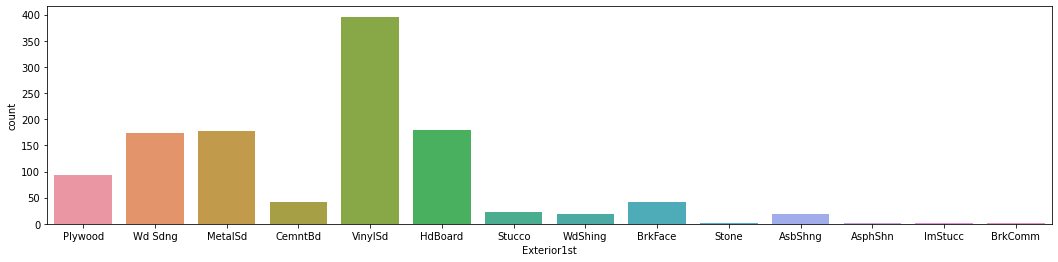

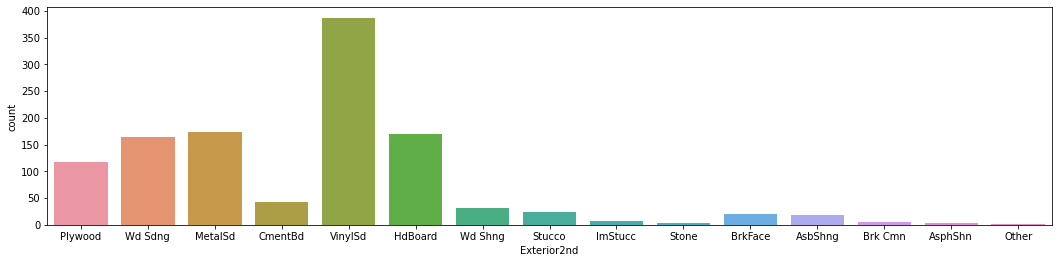

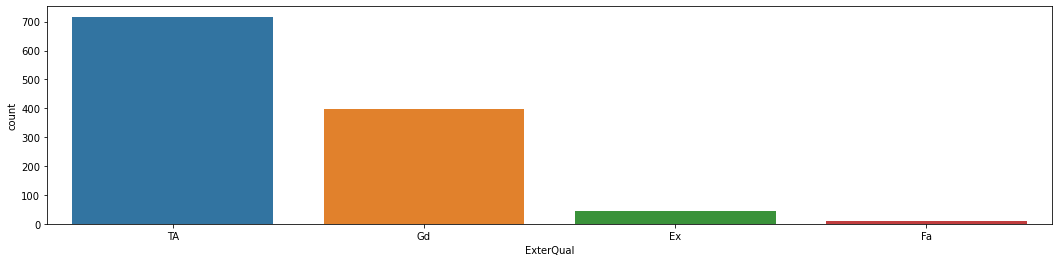

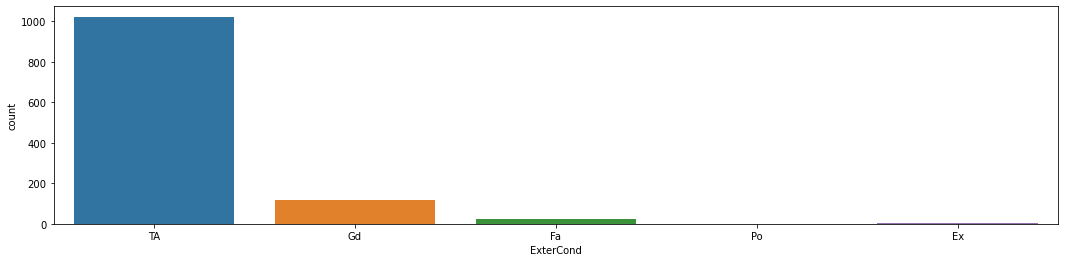

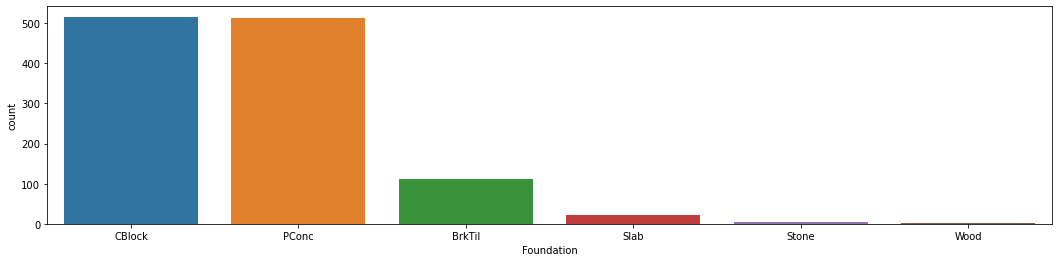

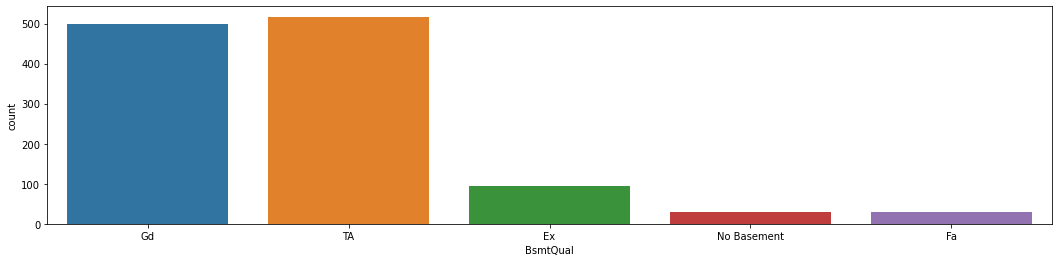

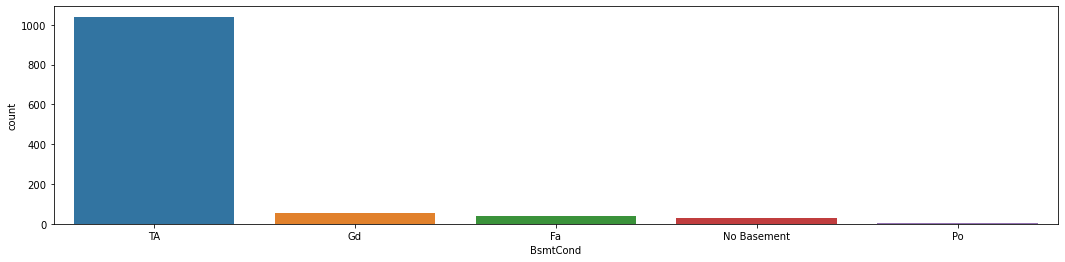

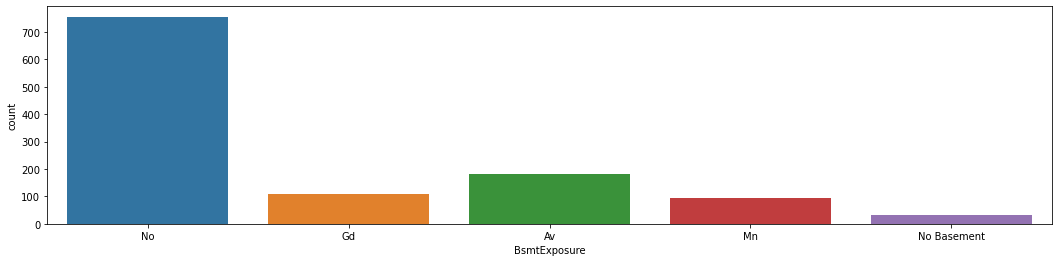

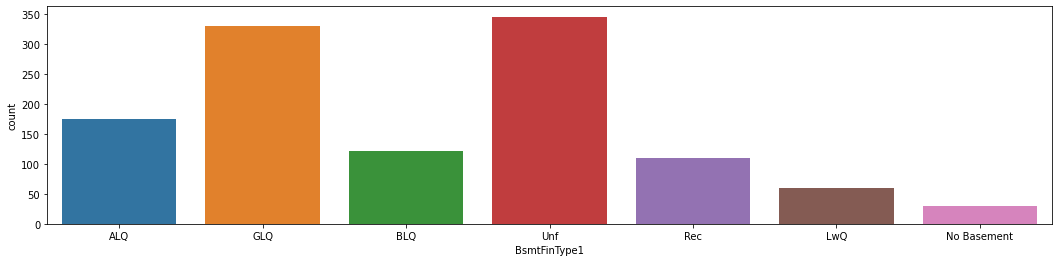

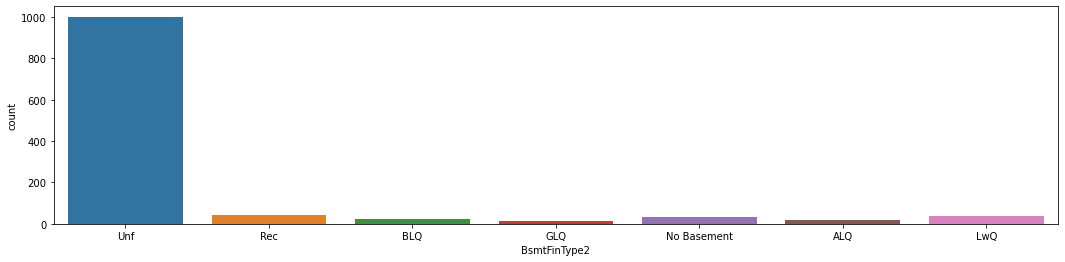

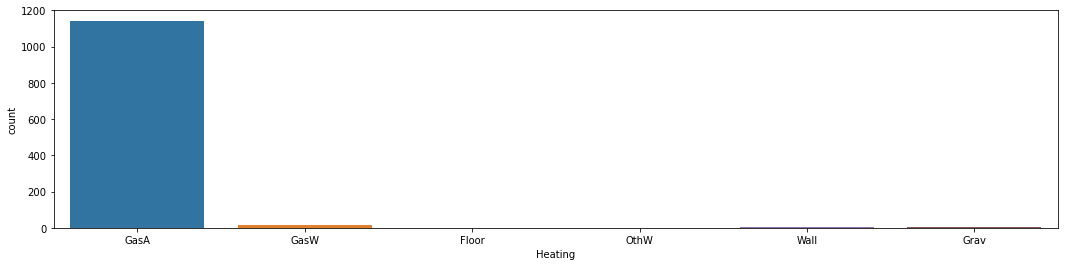

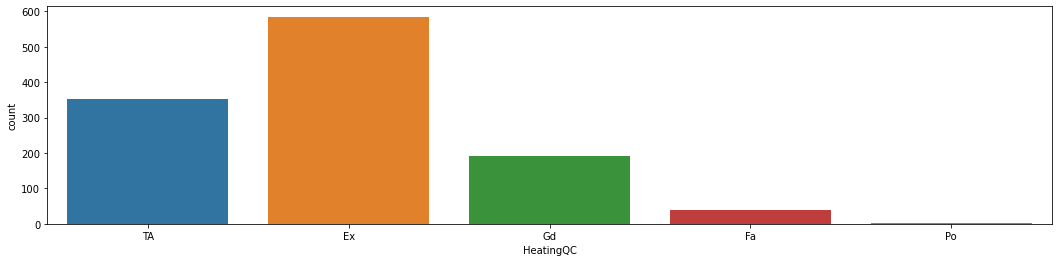

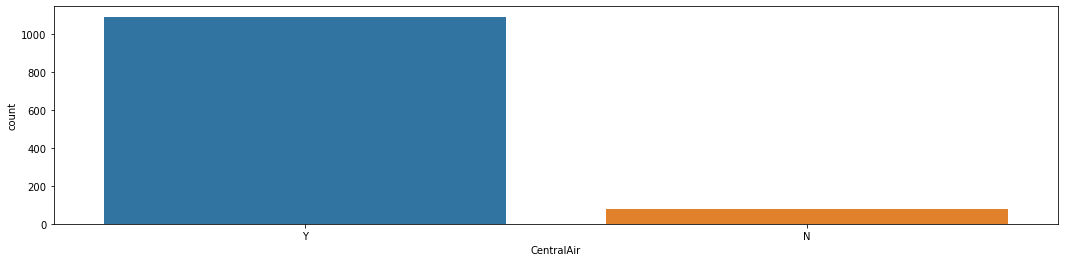

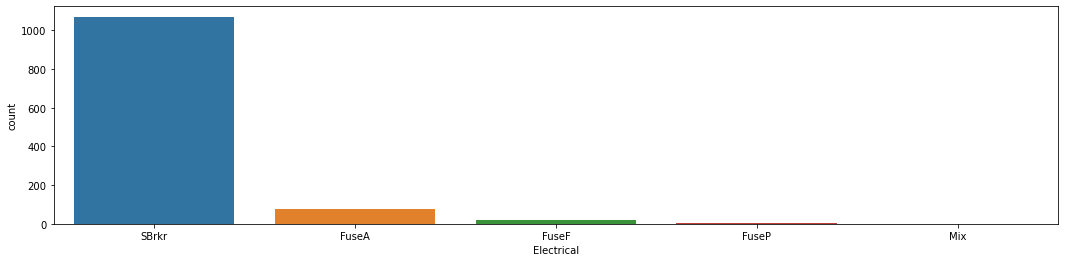

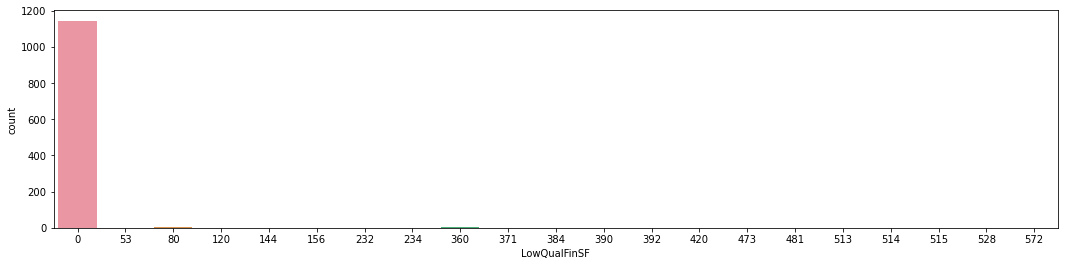

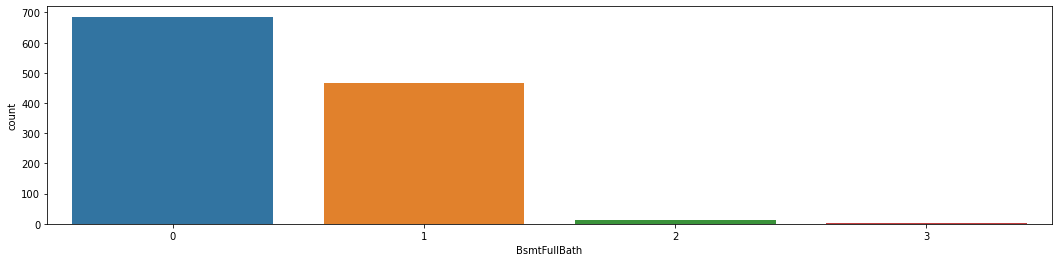

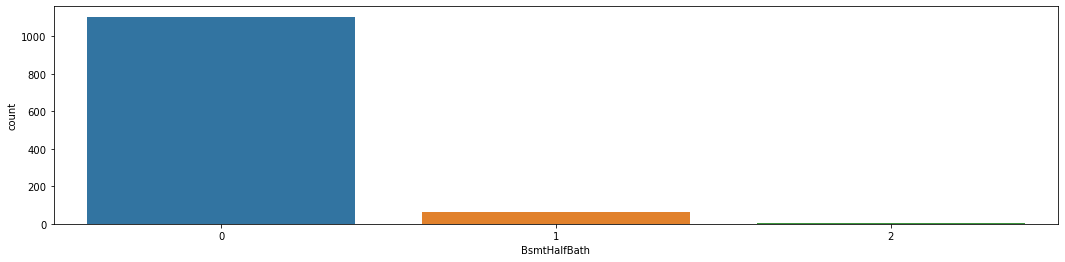

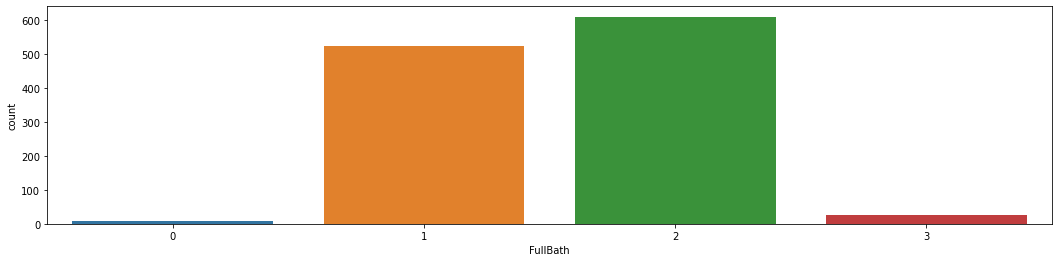

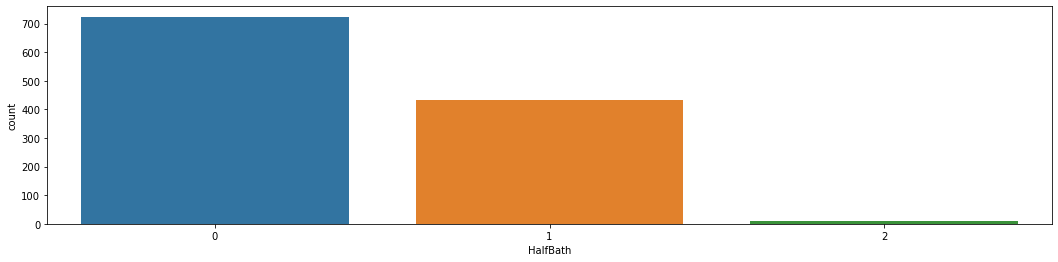

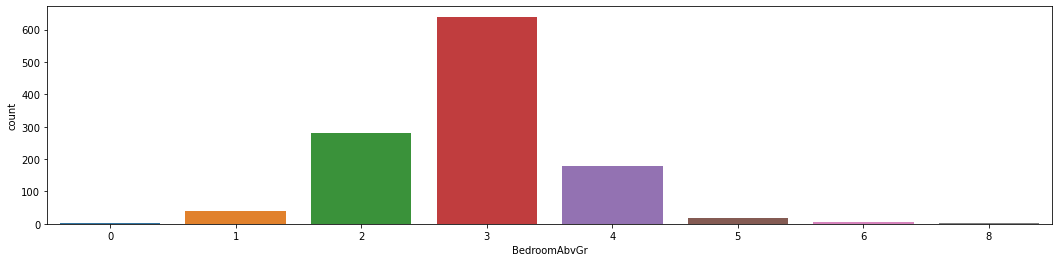

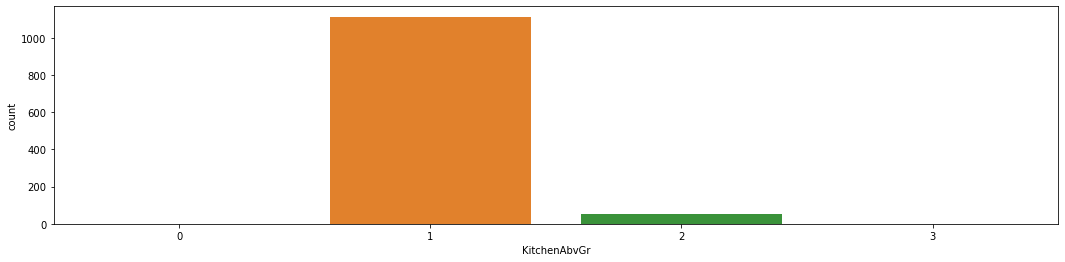

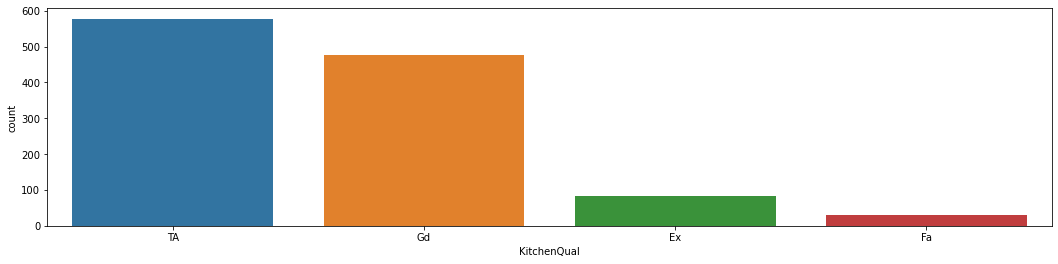

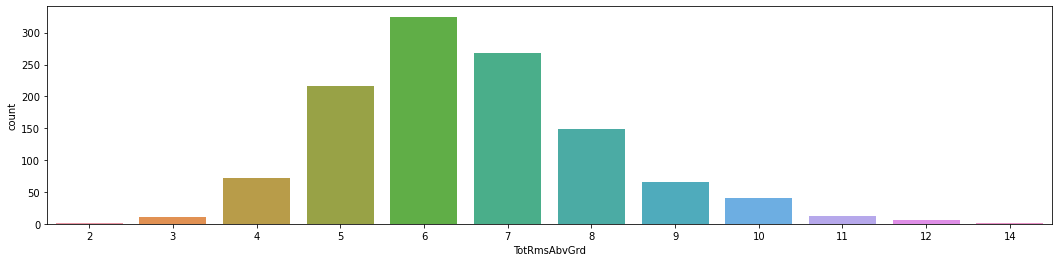

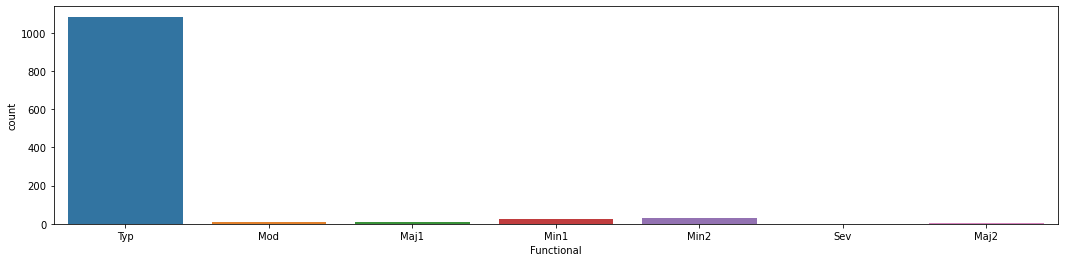

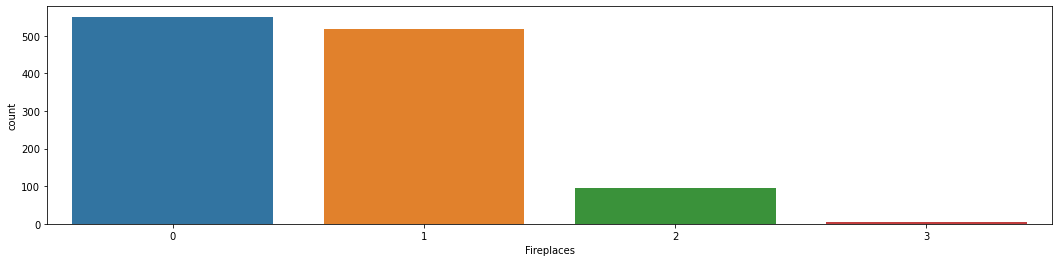

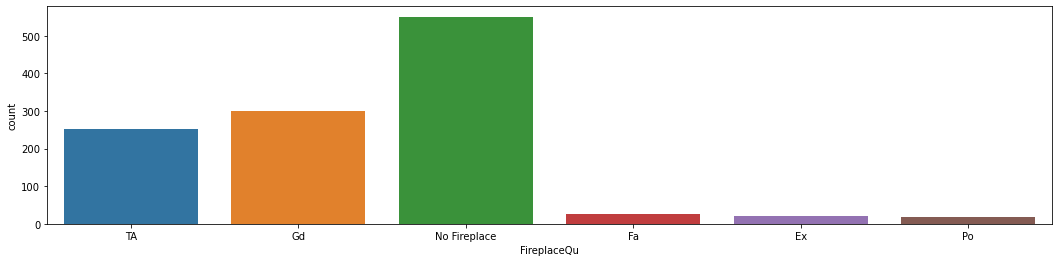

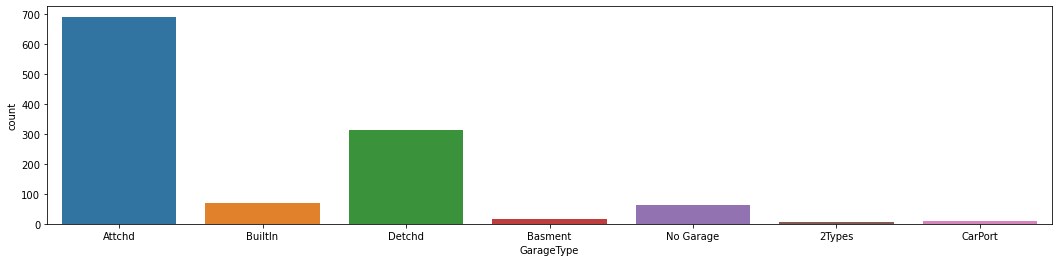

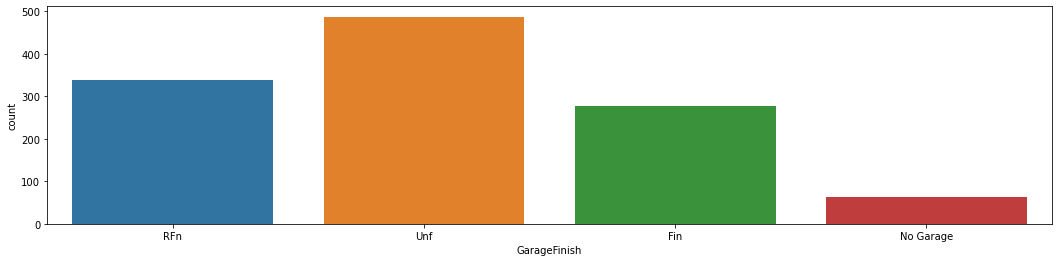

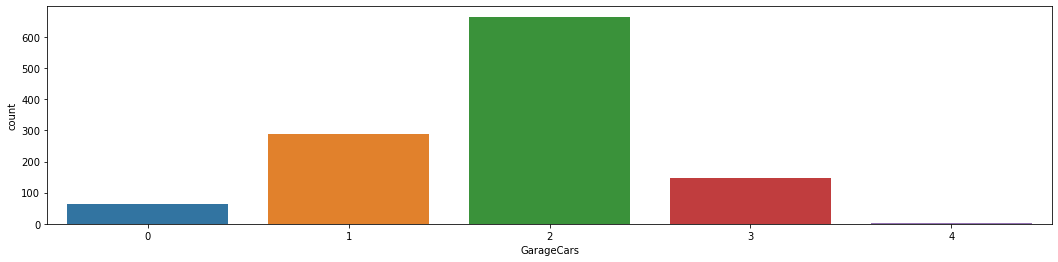

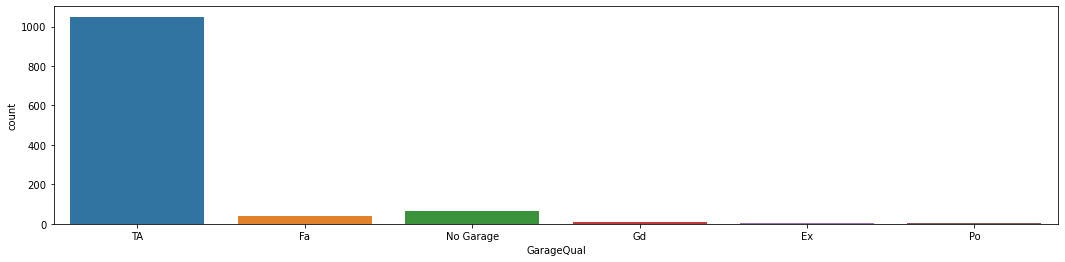

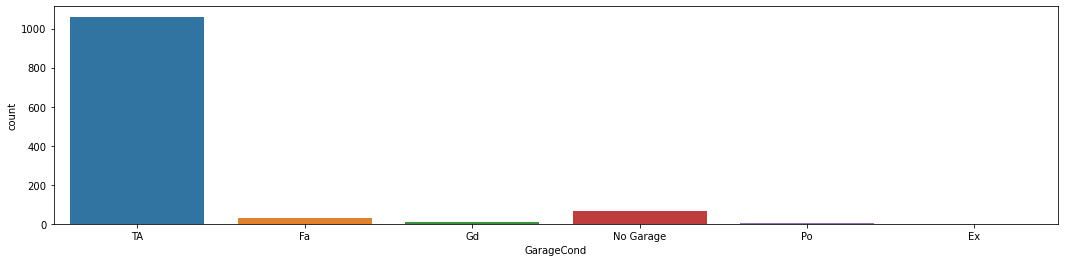

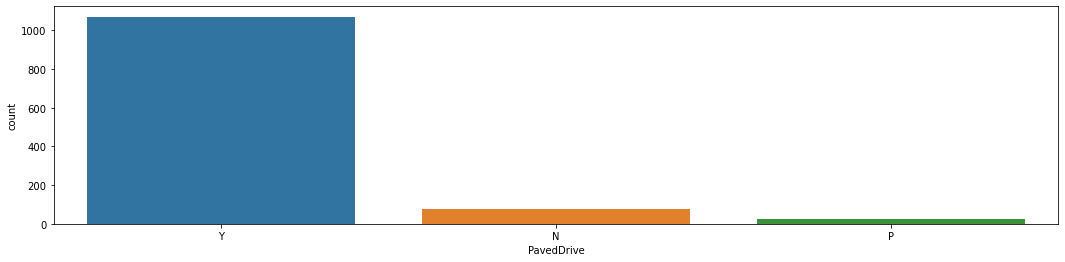

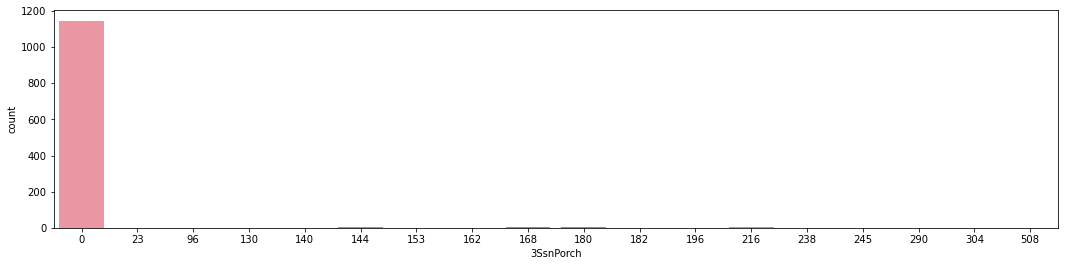

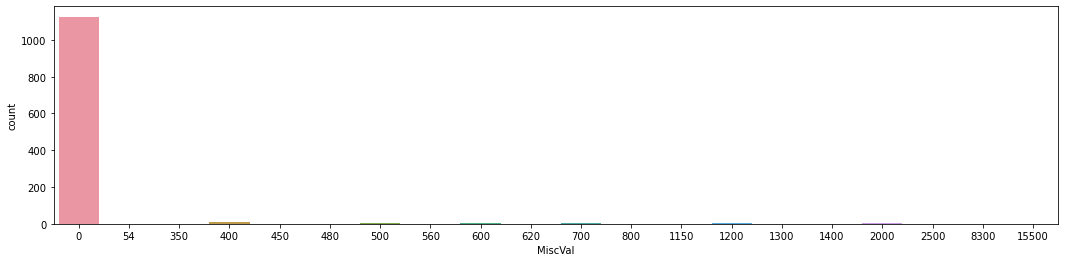

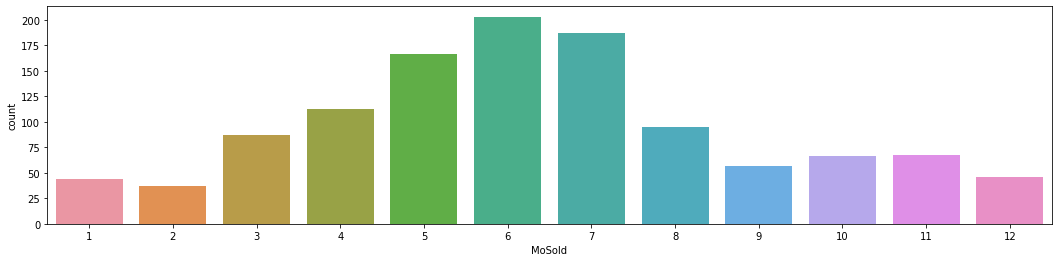

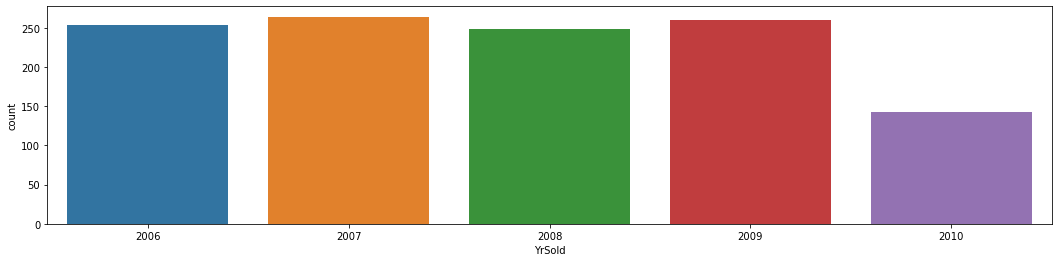

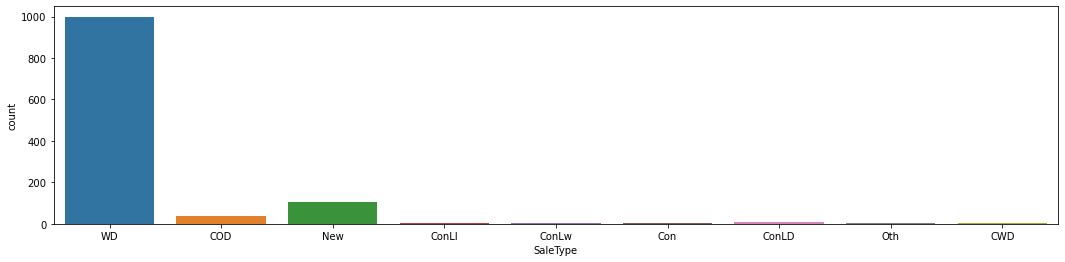

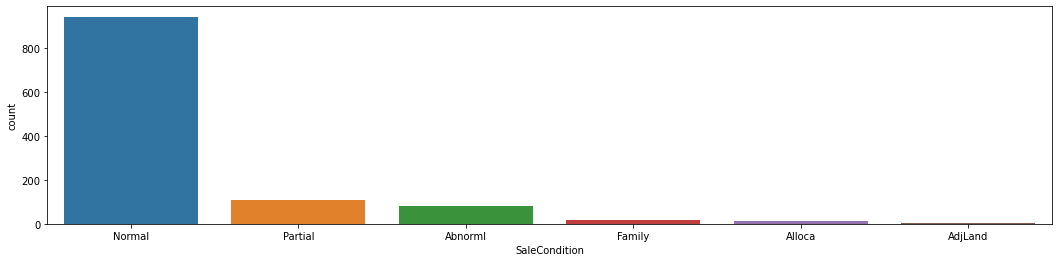

In [19]:
# Visualizing value counts for object type the columns
for i in df.columns :
    if (df[i].nunique()<25) :
        plt.figure(figsize=(18,4))
        sns.countplot(df[i])
        plt.show()

MSSubClass as 20 (1-STORY 1946 & NEWER ALL STYLES) is highly preferred followed by 60(2-STORY 1946 & NEWER). MSZoning is highly in RL (Residential Low Density) and least in C(all)	Commercial. Street is majorly Pave. Houses with No alley access are in majority and other options are in similar counts. LotShape as Reg (Regular) is leading all others. LAndContour as Lvl (Near Flat/Level) is highly preferred. LotConfig as Inside is in majority and FR3	Frontage on 3 sides of property is least in count. Gtl-Gentle in LandSlope is mostly preferred. Condition 1 as Normal is in majority others are very less comparatively and same for Condition 2 as well. BldgType Type of dwelling as 1Fam	Single-family Detached is leading all others. HouseStyle as 1Story	One story is highly preferred followed by 2Story Two story and 1.5Fin One and one-half story: 2nd level finished. OverallQual is mostly given Rates to overall material and finish of the house as Average followed by Above Average, Good, Very Good. OverallCond: Rates the overall condition of the house is Average for most of the houses. RoofStyle Gable is in majority among all other options. RoofMatl is highly chosen as CompShg Standard (Composite) Shingle. Exterior covering on house Exterior1st and Exterior2nd as VinylSd Vinyl Siding is highly preferred. ExterQual: Evaluates the quality of the material on the exterior, ExterCond: Evaluates the present condition of the material on the exterior and BsmtCond: Evaluates the general condition of the basement are rated as Average/Typical majorly. Type of foundation of houses are in CBlock	Cinder Block and PConc Poured Contrete majorly. BsmtQual Evaluates the height of the basement is mostly Typical (80-89 inches) followed by Good (90-99 inches) and very few houses have no basement. BsmtExposure: Refers to walkout or garden level walls and majority of houses have No Exposure and least have No Basement. BsmtFinType1: Rating of basement finished area is Unfinshed for highest number of houses folloed by Good Living Quarters. BsmtFinType2: Rating of basement finished area (if multiple types) is highest for Unfinshed. Type of heating is highly by GasA	(Gas forced warm air furnace). HeatingQC: Heating quality and condition is overall Excellent. CentralAir: Central air conditioning is there in majority of houses. Electrical: Electrical system SBrkr (Standard Circuit Breakers & Romex) is leading all others. LowQualFinSF: Low quality finished square feet (all floors) is 0 in high number. 3SsnPorch: Three season porch area in square feet and MiscVal: $Value of miscellaneous feature is 0 in majority.

BsmtFullBath: Basement full bathrooms are mostly 0 followed by 1. BsmtHalfBath: Basement half bathrooms are mostly 0 in count. FullBath: Full bathrooms above grade are 2 in most of the house data followed by 1. HalfBath: Half baths above grade are 0 in most of the houses, followed by 1 and least have 2. BedroomAbvGr are 3 in majority. KitchenAbvGr is 1 in majority. KitchenQual: Kitchen quality is highly Typical/Average followed by Good. TotRmsAbvGrd: Total rooms above grade (does not include bathrooms) are 6 followed by 7 then 5 and then 8. Functional: Home functionality (Assume typical unless deductions are warranted) is mostly Typical Functionality. Fireplaces: Number of fireplaces are 0 followed by 1 in majority of houses. FireplaceQu: Fireplace quality is majorly good in the houses where fireplaces are available but most houses have No Fireplace. GarageType: Garage location is mostly Attached to home followed by Detached from home. GarageFinish: Interior finish of the garage is majorly Unfinished followed by Rough Finished and then comes Finished least have No Garage. GarageCars: Size of garage in car capacity is mostly 2. GarageQual: Garage quality and GarageCond: Garage condition are mostly Typical/Average. PavedDrive: Paved driveway are mostly Paved. MoSold: Month Sold (MM) has highest count in 6 then 7 then 5. YrSold: Year Sold (YYYY) is highest is 

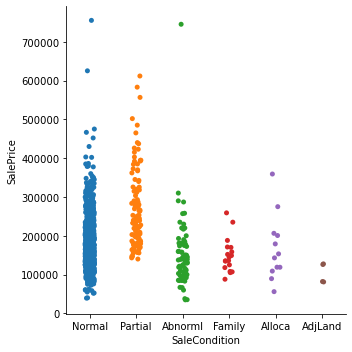

In [20]:
# Category plot for categorical data
sns.catplot(x='SaleCondition', y='SalePrice', data=df)

Houses are majorly of Normal Sale Condition and a few values are there for Adjoining Land Purchase. Starting and overall Sale Price is high for Partial	Home not completed when last assessed (associated with New Homes) Sale Condition houses.

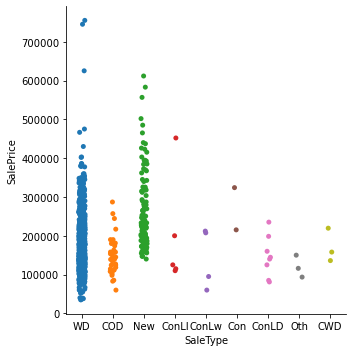

In [21]:
sns.catplot(x='SaleType',y='SalePrice',data=df)

Sale Type WD: Warranty Deed-Conventional has majority of data and Sale Price in this is lowest and highest both comparatively. Next New	Home just constructed and sold has goos amount of data with higher starting price w.r.t others.

<AxesSubplot:xlabel='OverallQual', ylabel='SalePrice'>

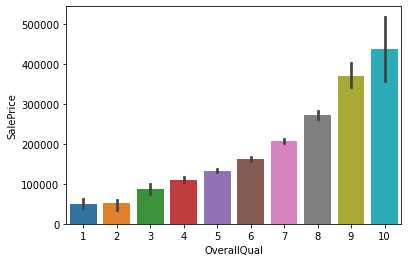

In [33]:
# Visualizing with barplot
sns.barplot(x='OverallQual',y='SalePrice',data=df)

Sale Price increases with increase in Rates the overall material and finish of the house.

<AxesSubplot:xlabel='ExterQual', ylabel='SalePrice'>

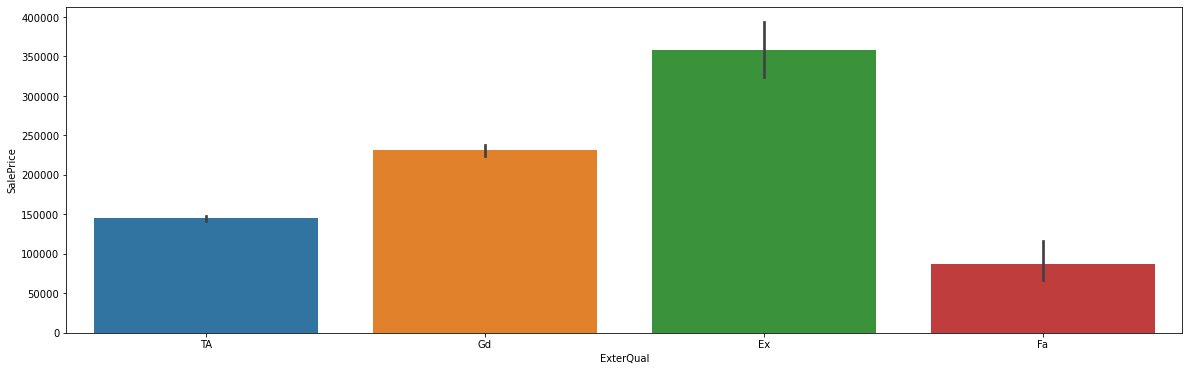

In [35]:
plt.figure(figsize=(20,6))
sns.barplot(x='ExterQual',y='SalePrice',data=df)

Sale Price is highest for Excellent ExterQual: Evaluates the quality of the material on the exterior and lowest for Fair ExterQual.

<AxesSubplot:xlabel='BsmtCond', ylabel='SalePrice'>

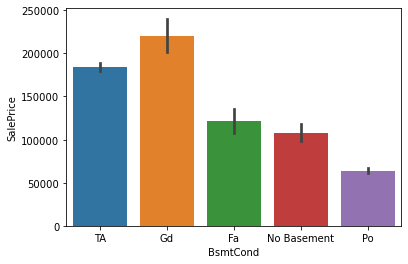

In [38]:
sns.barplot(x='BsmtCond',y='SalePrice',data=df)

SalePrice is highest for Good general condition of the basement and lease for poor general condition of the basement.

<AxesSubplot:xlabel='BsmtExposure', ylabel='SalePrice'>

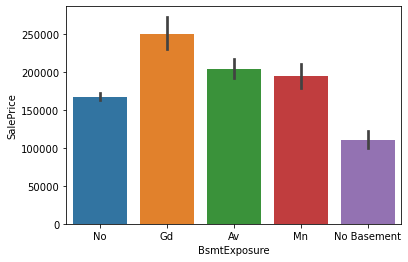

In [39]:
sns.barplot(x='BsmtExposure',y='SalePrice',data=df)

SalePrice is highest for Good Exposure in BsmtExposure: Refers to walkout or garden level walls and least for No Basement.

<AxesSubplot:xlabel='HeatingQC', ylabel='SalePrice'>

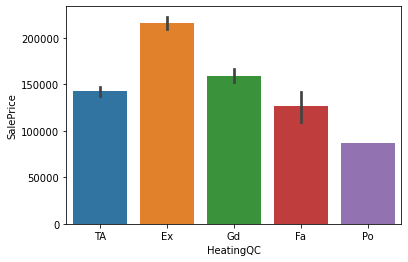

In [40]:
sns.barplot(x='HeatingQC',y='SalePrice',data=df)

SalePrice is highest for Excellent Heating quality and condition and lowest for Poor Heating quality and condition.

<AxesSubplot:xlabel='KitchenQual', ylabel='SalePrice'>

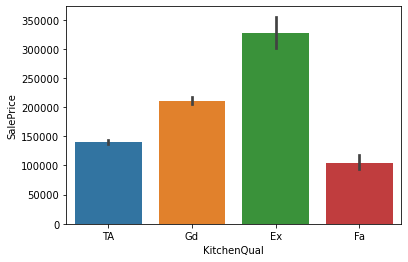

In [41]:
sns.barplot(x='KitchenQual',y='SalePrice',data=df)

SalesPrice is highest for Excellent Kitchen quality and least for Fair Kitchen quality.

<AxesSubplot:xlabel='OverallQual', ylabel='SalePrice'>

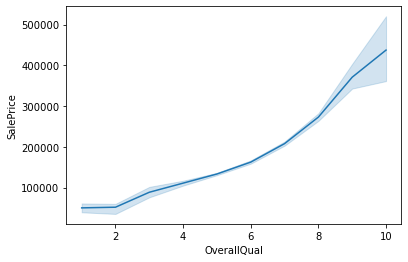

In [38]:
# Visualizing with lineplot
sns.lineplot(x='OverallQual',y='SalePrice',data=df)

SalePrice increases with increased rating of overall material and finish of the house

<AxesSubplot:xlabel='Fireplaces', ylabel='SalePrice'>

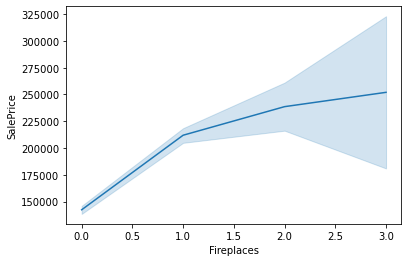

In [27]:
sns.lineplot(x='Fireplaces',y='SalePrice',data=df)

With increase in Fireplaces, SalePrice also increases.

<AxesSubplot:xlabel='MoSold', ylabel='SalePrice'>

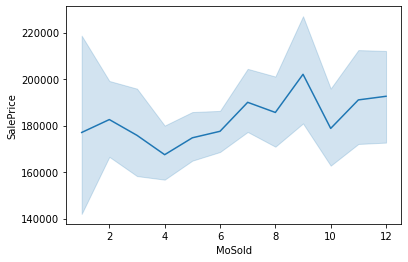

In [35]:
sns.lineplot(x='MoSold',y='SalePrice',data=df)

SalePrice is highest in 9th month and lowest in April.

In [30]:
df.groupby('YrSold')['SalePrice'].mean()

YrSold
2006    184861.842520
2007    188521.886364
2008    176113.782258
2009    178508.030769
2010    177127.823944
Name: SalePrice, dtype: float64

Mean SalePrice is highest for houses in the year 2007 and least in the year 2008.

In [22]:
df.groupby('YrSold')['WoodDeckSF'].mean()

YrSold
2006     95.346457
2007     86.431818
2008    100.427419
2009     97.965385
2010    105.323944
Name: WoodDeckSF, dtype: float64

Mean of Wood deck area in square feet is highest for the year 2010 and lowest for the year 2007.

In [23]:
df.groupby('RoofStyle')['SalePrice'].mean()

RoofStyle
Flat       204080.833333
Gable      173251.570492
Gambrel    145111.111111
Hip        214493.364444
Mansard    194795.800000
Shed       225000.000000
Name: SalePrice, dtype: float64

Mean of sale price is highest for Type of roof Shed and least for Type of roof Gabrel (Barn).

In [30]:
df.groupby('BsmtFinType1')['ScreenPorch'].sum()

BsmtFinType1
ALQ            3035
BLQ            2512
GLQ            4082
LwQ            1695
No Basement       0
Rec            2304
Unf            3952
Name: ScreenPorch, dtype: int64

Sum of Screen porch area in square feet is highest for Rating of basement finished area GLQ	Good Living Quarters and Least is for No Basement.

In [47]:
# Statistic Summary
df.describe()

MSSubClass  LotFrontage        LotArea  OverallQual  OverallCond  \
count  1168.000000  1168.000000    1168.000000  1168.000000  1168.000000   
mean     56.767979    70.807363   10484.749144     6.104452     5.595890   
std      41.940650    22.440317    8957.442311     1.390153     1.124343   
min      20.000000    21.000000    1300.000000     1.000000     1.000000   
25%      20.000000    60.000000    7621.500000     5.000000     5.000000   
50%      50.000000    70.000000    9522.500000     6.000000     5.000000   
75%      70.000000    79.250000   11515.500000     7.000000     6.000000   
max     190.000000   313.000000  164660.000000    10.000000     9.000000   

         YearBuilt  YearRemodAdd   BsmtFinSF1   BsmtFinSF2    BsmtUnfSF  ...  \
count  1168.000000   1168.000000  1168.000000  1168.000000  1168.000000  ...   
mean   1970.930651   1984.758562   444.726027    46.647260   569.721747  ...   
std      30.145255     20.785185   462.664785   163.520016   449.375525  ...   
min    1875.000000   1950.000000     0.000000     0.000000     0.000000  ...   
25%    1954.000000   1966.000000     0.000000     0.000000   216.000000  ...   
50%    1972.000000   1993.000000   385.500000     0.000000   474.000000  ...   
75%    2000.000000   2004.000000   714.500000     0.000000   816.000000  ...   
max    2010.000000   2010.000000  5644.000000  1474.000000  2336.000000  ...   

        GarageArea   WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  \
count  1168.000000  1168.000000  1168.000000    1168.000000  1168.000000   
mean    476.860445    96.206336    46.559932      23.015411     3.639555   
std     214.466769   126.158988    66.381023      63.191089    29.088867   
min       0.000000     0.000000     0.000000       0.000000     0.000000   
25%     338.000000     0.000000     0.000000       0.000000     0.000000   
50%     480.000000     0.000000    24.000000       0.000000     0.000000   
75%     576.000000   171.000000    70.000000       0.000000     0.000000   
max    1418.000000   857.000000   547.000000     552.000000   508.000000   

       ScreenPorch       MiscVal       MoSold       YrSold      SalePrice  
count  1168.000000   1168.000000  1168.000000  1168.000000    1168.000000  
mean     15.051370     47.315068     6.344178  2007.804795  181477.005993  
std      55.080816    543.264432     2.686352     1.329738   79105.586863  
min       0.000000      0.000000     1.000000  2006.000000   34900.000000  
25%       0.000000      0.000000     5.000000  2007.000000  130375.000000  
50%       0.000000      0.000000     6.000000  2008.000000  163995.000000  
75%       0.000000      0.000000     8.000000  2009.000000  215000.000000  
max     480.000000  15500.000000    12.000000  2010.000000  755000.000000  

[8 rows x 35 columns]

Column MSSubClass has range from 20 to 190, LotFrontage ranges from 21 to 313, LotArea are from 1300 and 164660, OverallQual has values from 1-10. OverallCond has values from 1-9, YearBuilt has years from 1875 to 2010. YearRemodAdd has years from 1950-2010. BsmtFinSF1 ranges from 0 to 5644. BsmtUnfSF ranges from 0 to 1474. BsmtUnfSF ranges from 0 to 2336. GarageArea ranges from 0-1418, WoodDeckSF ranges from 0-857, OpenPorchSF has values from 0-547, EnclosedPorch has values from 0 to 552, 3SsnPorch contains values from 0-508, ScreenPorch has values from 0-480, YrSold has years from 2006 to 2010, SalePrice has values starting from 34900 to 755000 and so on..

MSSubClass,LotArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,WoodDeckSF,OpenPorchSF,EnclosedPorch,SalePrice etc has mean>median i.e. right skewed. GarageArea has mean<median i.e. left skewed.

Standard deviation is high for many columns. Difference between 75 percentile and max value is high for many columns hence, outliers need to be treated.

### Dividing the data in categorical and numeric columns

In [48]:
# Categorical data
df_cat=df.select_dtypes(include='object')

# Categorical variables having numeric values
df_cat=pd.concat([df_cat,df['MSSubClass'],df['OverallQual'],df['OverallCond'],df['YearBuilt'],df['YearRemodAdd'],
                  df['BsmtFullBath'], df['BsmtHalfBath'],df['FullBath'],df['HalfBath'],df['BedroomAbvGr'],
                  df['KitchenAbvGr'],df['GarageYrBlt'],df['TotRmsAbvGrd'],df['Fireplaces'],df['GarageCars'],
                  df['MoSold'],df['YrSold']], axis=1)

# Categorical data in which encoding is not required
df_cat_num=df[['MSSubClass','OverallQual','OverallCond','BsmtFullBath','BsmtHalfBath','FullBath','HalfBath',
             'BedroomAbvGr','KitchenAbvGr','TotRmsAbvGrd','Fireplaces','GarageCars','YearBuilt','YearRemodAdd','GarageYrBlt',
               'YrSold','MoSold']]

# Nominal categorical data 
df_nominal=df[['MSZoning', 'Street', 'Alley', 'LandContour', 'LotConfig','LandSlope', 'Neighborhood', 'Condition1',
               'Condition2','BldgType','HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'Foundation',
               'Heating','CentralAir', 'Electrical', 'Functional', 'GarageType', 'GarageFinish', 'PavedDrive', 'SaleType', 
               'SaleCondition']]

# Ordinal categorical data 
df_ordinal=df[['LotShape', 'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
               'HeatingQC','KitchenQual', 'FireplaceQu', 'GarageQual', 'GarageCond', ]]

df_cat.shape

(1168, 55)

In [49]:
# Continuous data
df_con=df.select_dtypes(exclude='object')

# Removing the target column as data cleaning is not performed on target column(s)
df_con.drop(['SalePrice'],axis=1,inplace=True)

# Removing numeric categorical variables
df_con.drop(['MSSubClass','OverallQual','OverallCond','YearBuilt','YearRemodAdd','BsmtFullBath','BsmtHalfBath','FullBath',
             'HalfBath','BedroomAbvGr','KitchenAbvGr','GarageYrBlt','TotRmsAbvGrd','Fireplaces','GarageCars','MoSold','YrSold'],
              axis=1,inplace=True)

# Checking Dataset
df_con.shape

(1168, 17)

In [50]:
# Checking outliers
from scipy.stats import zscore
z=np.abs(zscore(df_con))
np.where(z>5)

(array([  20,   22,   25,   32,   33,   51,   51,   63,   66,   95,   97,
          98,  103,  103,  113,  119,  141,  157,  166,  206,  226,  228,
         253,  305,  309,  320,  333,  361,  361,  361,  463,  478,  488,
         507,  534,  562,  563,  572,  591,  592,  592,  592,  592,  592,
         592,  614,  637,  686,  689,  691,  713,  721,  722,  769,  791,
         794,  824,  833,  843,  876,  881,  887,  911,  956, 1008, 1023,
        1038, 1053, 1073, 1080, 1082, 1104, 1108, 1120, 1120, 1123],
       dtype=int64),
 array([14,  3,  3, 16,  8, 12, 15, 14,  8,  3,  3, 14,  8, 15,  1, 11,  9,
        14, 14, 14, 14,  8, 14,  6, 11,  8,  8,  6,  9, 12, 14, 14, 14,  3,
         8,  3, 16, 15,  3,  0,  1,  2,  5,  6,  9,  8, 14,  3,  1,  9, 12,
         8, 14,  8, 14,  3, 14,  3,  3, 15, 15, 14,  3, 12, 15,  8,  1,  0,
         3,  8,  1, 13,  8,  8, 13,  1], dtype=int64))

Output showing there are presence of outliers in the columns.

In [51]:
# Checking the outlier in the dataset
z.head()

LotFrontage   LotArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0     0.035994  0.620616    0.702161    0.285392   0.864410     0.038239   
1     1.078550  0.600903    0.202665    4.749787   1.053642     2.614679   
2     0.944805  0.063075    0.902279    0.285392   0.700654     0.126458   
3     1.524367  0.141424    0.562795    0.285392   1.267363     1.770946   
4     0.035994  0.686902    1.732609    0.285392   0.475801     1.223537   

   1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  GarageArea  WoodDeckSF  \
0  0.541850  0.793674      0.125418   1.074363    0.171944    0.762907   
1  2.678144  0.793674      0.125418   1.310934    0.672371    0.120585   
2  0.109619  1.222216      0.125418   0.924437    0.101973    0.664476   
3  1.724166  0.793674      0.125418   0.604250    0.322517    0.762907   
4  1.105232  0.793674      0.125418   0.145757    0.243217    1.140270   

   OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch   MiscVal  
0     2.387850       0.364375   0.125172     0.273377  0.087131  
1     2.417992       0.364375   0.125172     3.795117  0.087131  
2     1.257525       0.364375   0.125172     0.273377  0.087131  
3     1.136957       0.364375   0.125172     0.273377  0.087131  
4     0.701705       0.364375   0.125172     0.273377  0.087131

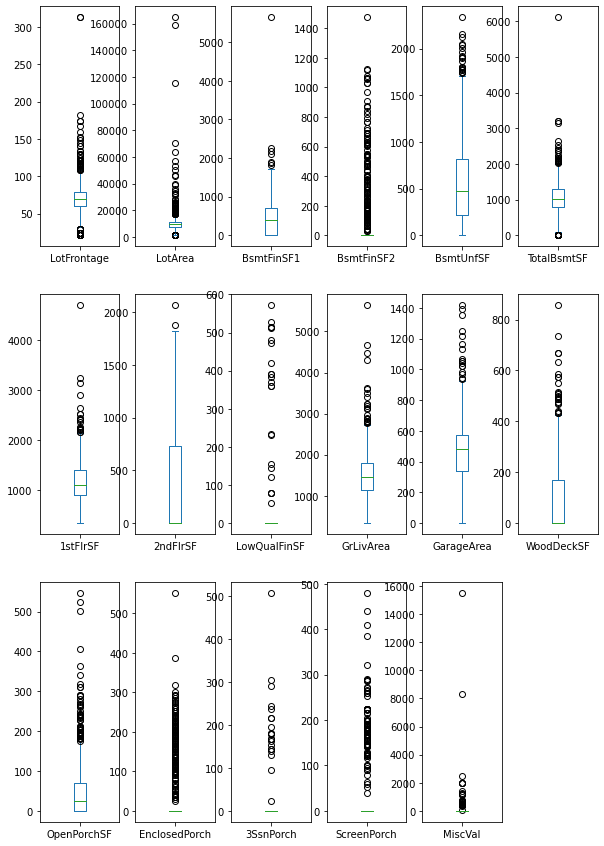

In [52]:
# Visualising outliers
df_con.plot(kind='box',subplots=True, layout=(3,-1), figsize=(10,15))
plt.show()

Outliers are present in columns but these columns have impact on target column hence we will not remove these outliers.

In [53]:
# Checking skewness
df_con.skew()

LotFrontage       2.733440
LotArea          10.659285
BsmtFinSF1        1.871606
BsmtFinSF2        4.365829
BsmtUnfSF         0.909057
TotalBsmtSF       1.744591
1stFlrSF          1.513707
2ndFlrSF          0.823479
LowQualFinSF      8.666142
GrLivArea         1.449952
GarageArea        0.189665
WoodDeckSF        1.504929
OpenPorchSF       2.410840
EnclosedPorch     3.043610
3SsnPorch         9.770611
ScreenPorch       4.105741
MiscVal          23.065943
dtype: float64

Skewness is present in the dataset as acceptable range is +/-5.

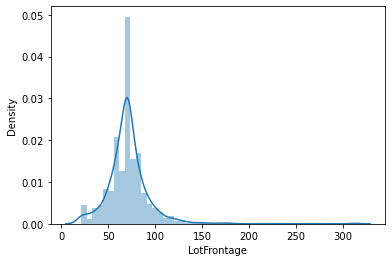

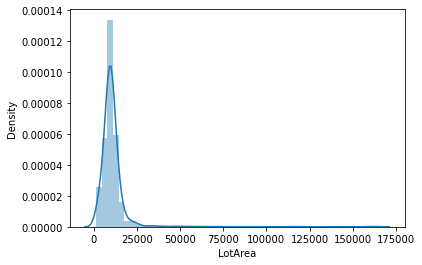

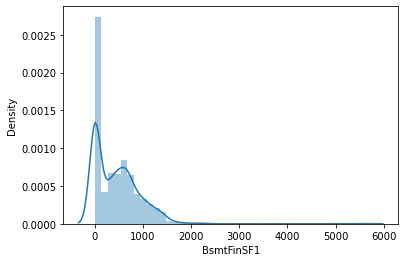

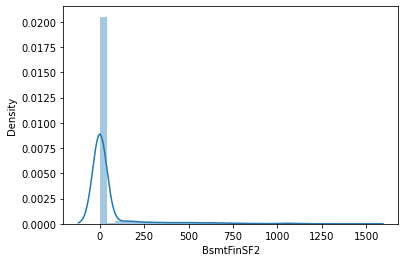

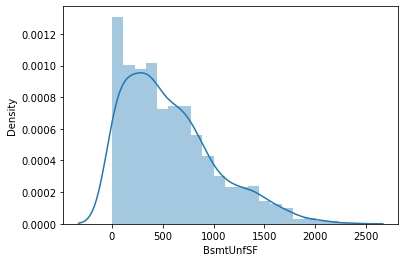

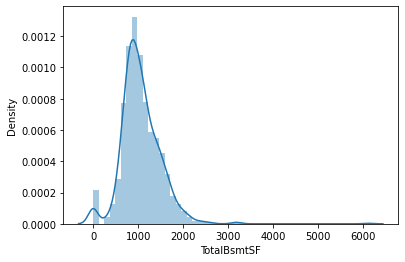

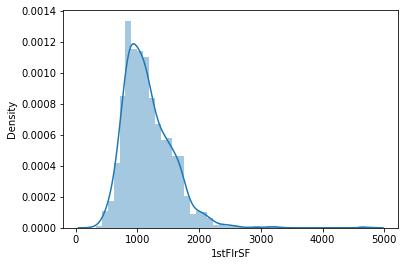

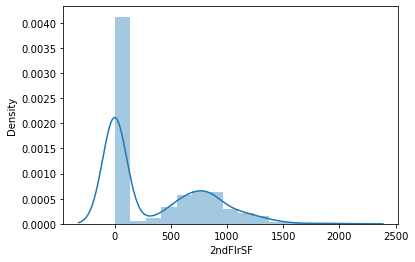

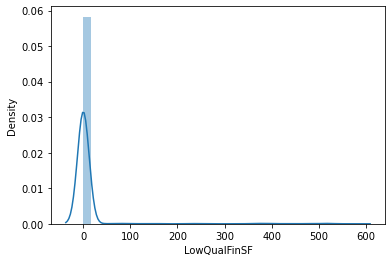

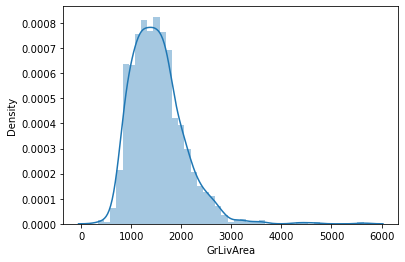

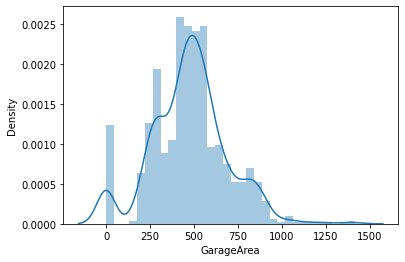

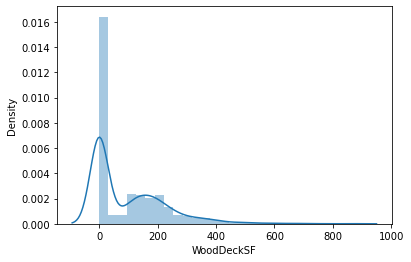

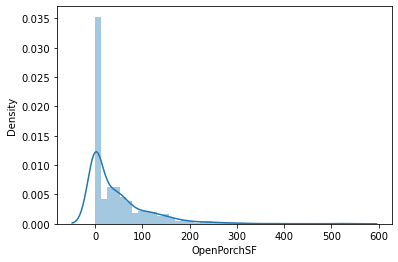

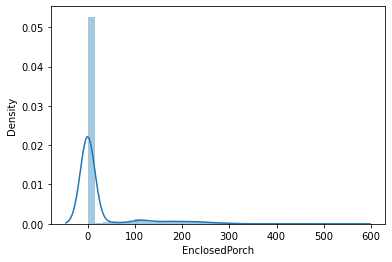

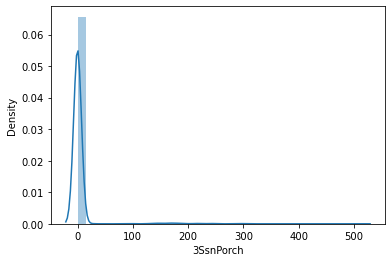

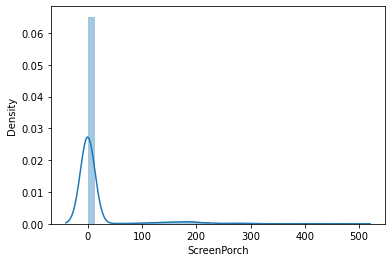

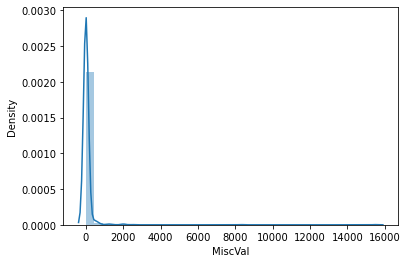

In [37]:
# Visualizing skewness
for i in df_con.columns :
    sns.distplot(df_con[i])
    plt.show()

We need to treat skewness in 'KMsDriven' considering a threshold value for skewness as +/-0.5 (we will not transform ‘Price’ column, since it is our target variable).

### Data Cleaning

In [54]:
# Removing outliers
df1=df_con.copy()
df1=df_con[(z<5).all(axis=1)]
df1.head()

LotFrontage  LotArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0         70.0     4928         120           0        958         1078   
1         95.0    15865         351         823       1043         2217   
2         92.0     9920         862           0        255         1117   
3        105.0    11751         705           0       1139         1844   
4         70.0    16635        1246           0        356         1602   

   1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  GarageArea  WoodDeckSF  \
0       958         0             0        958         440           0   
1      2217         0             0       2217         621          81   
2      1127       886             0       2013         455         180   
3      1844         0             0       1844         546           0   
4      1602         0             0       1602         529         240   

   OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  MiscVal  
0          205              0          0            0        0  
1          207              0          0          224        0  
2          130              0          0            0        0  
3          122              0          0            0        0  
4            0              0          0            0        0

In [55]:
# Printing shape of dataset before and after removing outliers
print('Shape of original dataset : ',df_con.shape)
print('Shape of dataset after removing outliers : ',df1.shape)

Shape of original dataset :  (1168, 17)
Shape of dataset after removing outliers :  (1102, 17)


In [56]:
# Percentage Data Lost
data_percent=(1168-1102)/1168*100
data_percent

5.650684931506849

Approx 5.7% data is lost after removing the outliers.

In [57]:
# Checking skewness after removing outliers
df1.skew()

LotFrontage       0.723705
LotArea           2.749281
BsmtFinSF1        0.727947
BsmtFinSF2        4.050695
BsmtUnfSF         0.923731
TotalBsmtSF       0.426453
1stFlrSF          0.848013
2ndFlrSF          0.761920
LowQualFinSF     14.137001
GrLivArea         0.710616
GarageArea        0.166022
WoodDeckSF        1.320184
OpenPorchSF       1.780517
EnclosedPorch     2.763284
3SsnPorch        15.011745
ScreenPorch       3.644911
MiscVal           9.535579
dtype: float64

We can see skewness in the column KMsDriven.

In [58]:
# Removing skewness

df2=df1.copy()
skew_log=['BsmtFinSF2', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', 
          '3SsnPorch', 'ScreenPorch', 'MiscVal']
skew_sqrt=['LotFrontage', 'LotArea', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', 'LowQualFinSF']

for i in skew_log :
    if (df2[i].skew()>0.5 or df2[i].skew()<-0.5) :
        df2[i]=np.log(df2[i]+1)
for j in skew_sqrt :
    if (df2[j].skew()>0.5 or df2[j].skew()<-0.5) :
        df2[j]=np.sqrt(df2[j])

df2.skew()

LotFrontage      -0.217054
LotArea           0.592808
BsmtFinSF1       -0.089114
BsmtFinSF2        2.702316
BsmtUnfSF        -0.224730
TotalBsmtSF       0.426453
1stFlrSF         -0.002602
2ndFlrSF          0.282671
LowQualFinSF     11.893471
GrLivArea        -0.171551
GarageArea        0.166022
WoodDeckSF        0.136503
OpenPorchSF       0.009379
EnclosedPorch     2.111936
3SsnPorch        13.792649
ScreenPorch       3.157244
MiscVal           5.444213
dtype: float64

Removed skewness from the columns by applying transformations based on the kind of data distribution but skewness is still present in columns : LotArea, BsmtFinSF2, LowQualFinSF, EnclosedPorch, 3SsnPorch, ScreenPorch, MiscVal.

In [59]:
skew_log1=['BsmtFinSF2', 'LowQualFinSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'MiscVal']
skew_sqrt2=['LotArea']
for k in skew_log1 :
    if (df2[k].skew()>0.5 or df2[k].skew()<-0.5) :
        df2[k]=np.log(df2[k]+1)

for l in skew_sqrt2 :
    if (df2[l].skew()>0.5 or df2[l].skew()<-0.5) :
        df2[l]=np.sqrt(df2[l])

df2.skew()

LotFrontage      -0.217054
LotArea          -0.234455
BsmtFinSF1       -0.089114
BsmtFinSF2        2.630258
BsmtUnfSF        -0.224730
TotalBsmtSF       0.426453
1stFlrSF         -0.002602
2ndFlrSF          0.282671
LowQualFinSF     11.079868
GrLivArea        -0.171551
GarageArea        0.166022
WoodDeckSF        0.136503
OpenPorchSF       0.009379
EnclosedPorch     2.072714
3SsnPorch        13.565225
ScreenPorch       3.134417
MiscVal           5.367628
dtype: float64

Removed skewness from the columns by applying transformations based on the kind of data distribution but skewness is still present in columns : BsmtFinSF2, LowQualFinSF, EnclosedPorch, 3SsnPorch, ScreenPorch, MiscVal.

In [70]:
# Executed below skewness removal code 6-8 times
skew_rem=['BsmtFinSF2', 'LowQualFinSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'MiscVal']
for m in skew_rem :
    df2[m]=np.sqrt(df2[m])

df2.skew()

LotFrontage      -0.217054
LotArea          -0.234455
BsmtFinSF1       -0.089114
BsmtFinSF2        2.607788
BsmtUnfSF        -0.224730
TotalBsmtSF       0.426453
1stFlrSF         -0.002602
2ndFlrSF          0.282671
LowQualFinSF     10.944344
GrLivArea        -0.171551
GarageArea        0.166022
WoodDeckSF        0.136503
OpenPorchSF       0.009379
EnclosedPorch     2.059259
3SsnPorch        13.459762
ScreenPorch       3.127138
MiscVal           5.347555
dtype: float64

Removed skewness from all columns but in columns 'BsmtFinSF2', 'LowQualFinSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'MiscVal' no significant change is seen on further applying transformations due to the kind of data distribution. Hence we can consider the present values as skewness threshold.

In [71]:
# Checking dataset df2
df2.head()

LotFrontage    LotArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0     8.366600   8.378527   10.954451    0.000000  30.951575         1078   
1     9.746794  11.223027   18.734994    1.000349  32.295511         2217   
2     9.591663   9.979940   29.359837    0.000000  15.968719         1117   
3    10.246951  10.411630   26.551836    0.000000  33.749074         1844   
4     8.366600  11.356793   35.298725    0.000000  18.867962         1602   

   1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  GarageArea  WoodDeckSF  \
0  6.865891  0.000000           0.0   6.865891         440    0.000000   
1  7.704361  0.000000           0.0   7.704361         621    4.406719   
2  7.028201  6.787845           0.0   7.607878         455    5.198497   
3  7.520235  0.000000           0.0   7.520235         546    0.000000   
4  7.379632  0.000000           0.0   7.379632         529    5.484797   

   OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  MiscVal  
0     5.327876            0.0        0.0     0.000000      0.0  
1     5.337538            0.0        0.0     1.000303      0.0  
2     4.875197            0.0        0.0     0.000000      0.0  
3     4.812184            0.0        0.0     0.000000      0.0  
4     0.000000            0.0        0.0     0.000000      0.0

In [72]:
# Combining all numeric columns 
df3=pd.concat([df2,df['SalePrice']],axis=1)
df3.dropna(inplace=True)
print(df3.isnull().sum().any())
df3.head()

False


LotFrontage    LotArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0     8.366600   8.378527   10.954451    0.000000  30.951575       1078.0   
1     9.746794  11.223027   18.734994    1.000349  32.295511       2217.0   
2     9.591663   9.979940   29.359837    0.000000  15.968719       1117.0   
3    10.246951  10.411630   26.551836    0.000000  33.749074       1844.0   
4     8.366600  11.356793   35.298725    0.000000  18.867962       1602.0   

   1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  GarageArea  WoodDeckSF  \
0  6.865891  0.000000           0.0   6.865891       440.0    0.000000   
1  7.704361  0.000000           0.0   7.704361       621.0    4.406719   
2  7.028201  6.787845           0.0   7.607878       455.0    5.198497   
3  7.520235  0.000000           0.0   7.520235       546.0    0.000000   
4  7.379632  0.000000           0.0   7.379632       529.0    5.484797   

   OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  MiscVal  SalePrice  
0     5.327876            0.0        0.0     0.000000      0.0     128000  
1     5.337538            0.0        0.0     1.000303      0.0     268000  
2     4.875197            0.0        0.0     0.000000      0.0     269790  
3     4.812184            0.0        0.0     0.000000      0.0     190000  
4     0.000000            0.0        0.0     0.000000      0.0     215000

### Apply encoding on categorical columns

In [73]:
# Checking for the unique values
for i in df_cat.columns :
    print(i)
    print(df_cat[i].unique())

MSZoning
['RL' 'RM' 'FV' 'RH' 'C (all)']
Street
['Pave' 'Grvl']
Alley
['No access' 'Grvl' 'Pave']
LotShape
['IR1' 'Reg' 'IR2' 'IR3']
LandContour
['Lvl' 'Bnk' 'HLS' 'Low']
LotConfig
['Inside' 'CulDSac' 'FR2' 'Corner' 'FR3']
LandSlope
['Gtl' 'Mod' 'Sev']
Neighborhood
['NPkVill' 'NAmes' 'NoRidge' 'NWAmes' 'Gilbert' 'Sawyer' 'Edwards'
 'IDOTRR' 'CollgCr' 'Mitchel' 'Crawfor' 'BrDale' 'StoneBr' 'BrkSide'
 'NridgHt' 'OldTown' 'Somerst' 'Timber' 'SWISU' 'SawyerW' 'ClearCr'
 'Veenker' 'Blmngtn' 'MeadowV' 'Blueste']
Condition1
['Norm' 'Feedr' 'RRAn' 'PosA' 'RRAe' 'Artery' 'PosN' 'RRNe' 'RRNn']
Condition2
['Norm' 'RRAe' 'Feedr' 'PosN' 'Artery' 'RRNn' 'PosA' 'RRAn']
BldgType
['TwnhsE' '1Fam' 'Duplex' 'Twnhs' '2fmCon']
HouseStyle
['1Story' '2Story' '1.5Fin' 'SFoyer' '1.5Unf' 'SLvl' '2.5Fin' '2.5Unf']
RoofStyle
['Gable' 'Flat' 'Hip' 'Shed' 'Gambrel' 'Mansard']
RoofMatl
['CompShg' 'Tar&Grv' 'WdShngl' 'WdShake' 'Roll' 'ClyTile' 'Metal'
 'Membran']
Exterior1st
['Plywood' 'Wd Sdng' 'MetalSd' 'CemntBd' '

In [74]:
# Applying label encoder on Nominal variables
from sklearn.preprocessing import LabelEncoder

df_nominal_enc=df_nominal.copy()
le=LabelEncoder()
for i in df_nominal_enc.columns :
    df_nominal_enc[i]=le.fit_transform(df_nominal[i])
df_nominal_enc.head()

MSZoning  Street  Alley  LandContour  LotConfig  LandSlope  Neighborhood  \
0         3       1      1            3          4          0            13   
1         3       1      1            3          4          1            12   
2         3       1      1            3          1          0            15   
3         3       1      1            3          4          0            14   
4         3       1      1            3          2          0            14   

   Condition1  Condition2  BldgType  ...  Foundation  Heating  CentralAir  \
0           2           2         4  ...           1        1           1   
1           2           2         0  ...           2        1           1   
2           2           2         0  ...           2        1           1   
3           2           2         0  ...           1        1           1   
4           2           2         0  ...           1        1           1   

   Electrical  Functional  GarageType  GarageFinish  PavedDrive  SaleType  \
0           4           6           1             2           2         8   
1           4           6           1             3           2         8   
2           4           6           1             3           2         8   
3           4           6           1             2           2         0   
4           4           6           1             0           2         8   

   SaleCondition  
0              4  
1              4  
2              4  
3              4  
4              4  

[5 rows x 25 columns]

In [75]:
# Applying encoding on Ordinal variables
dict_LotShape= {'Reg':4, 'IR1':3, 'IR2':2, 'IR3':1}
dict_ExterQual={'Ex':5, 'Gd':4, 'TA':3,'Fa':2, 'Po':1}
dict_ExterCond={'Ex':5, 'Gd':4, 'TA':3,'Fa':2, 'Po':1}
dict_BsmtQual={'Ex':5, 'Gd':4, 'TA':3,'Fa':2, 'Po':1, 'No Basement':0}
dict_BsmtCond={'Ex':5, 'Gd':4, 'TA':3,'Fa':2, 'Po':1, 'No Basement':0}
dict_BsmtExposure={'Gd':4, 'Av':3, 'Mn':2,'No':1, 'No Basement':0}
dict_BsmtFinType1={'GLQ':6, 'ALQ':5, 'BLQ':4,'Rec':3, 'LwQ':2, 'Unf':1, 'No Basement':0}
dict_BsmtFinType2={'GLQ':6, 'ALQ':5, 'BLQ':4,'Rec':3, 'LwQ':2, 'Unf':1, 'No Basement':0}
dict_HeatingQC={'Ex':5, 'Gd':4, 'TA':3,'Fa':2, 'Po':1}
dict_KitchenQual={'Ex':5, 'Gd':4, 'TA':3,'Fa':2, 'Po':1}
dict_FireplaceQu={'Ex':5, 'Gd':4, 'TA':3,'Fa':2, 'Po':1, 'No Fireplace':0}
dict_GarageQual={'Ex':5, 'Gd':4, 'TA':3,'Fa':2, 'Po':1, 'No Garage':0}
dict_GarageCond={'Ex':5, 'Gd':4, 'TA':3,'Fa':2, 'Po':1, 'No Garage':0}

# Mapping for encoding
df_ordinal['LotShape'] = df_ordinal['LotShape'].map(dict_LotShape)
df_ordinal['ExterQual']=df_ordinal['ExterQual'].map(dict_ExterQual)
df_ordinal['ExterCond']=df_ordinal['ExterCond'].map(dict_ExterCond)
df_ordinal['BsmtQual']=df_ordinal['BsmtQual'].map(dict_BsmtQual)
df_ordinal['BsmtCond']=df_ordinal['BsmtCond'].map(dict_BsmtCond)
df_ordinal['BsmtExposure']=df_ordinal['BsmtExposure'].map(dict_BsmtExposure)
df_ordinal['BsmtFinType1']=df_ordinal['BsmtFinType1'].map(dict_BsmtFinType1)
df_ordinal['BsmtFinType2']=df_ordinal['BsmtFinType2'].map(dict_BsmtFinType2)
df_ordinal['HeatingQC']=df_ordinal['HeatingQC'].map(dict_HeatingQC)
df_ordinal['KitchenQual']=df_ordinal['KitchenQual'].map(dict_KitchenQual)
df_ordinal['FireplaceQu']=df_ordinal['FireplaceQu'].map(dict_FireplaceQu)
df_ordinal['GarageQual']=df_ordinal['GarageQual'].map(dict_GarageQual)
df_ordinal['GarageCond']=df_ordinal['GarageCond'].map(dict_GarageCond)

# Review dataset
df_ordinal.head()

LotShape  ExterQual  ExterCond  BsmtQual  BsmtCond  BsmtExposure  \
0         3          3          3         4         3             1   
1         3          4          4         3         4             4   
2         3          4          3         4         3             3   
3         3          3          3         4         3             1   
4         3          4          3         4         3             1   

   BsmtFinType1  BsmtFinType2  HeatingQC  KitchenQual  FireplaceQu  \
0             5             1          3            3            3   
1             5             3          5            4            3   
2             6             1          5            3            3   
3             4             1          5            3            3   
4             5             1          4            4            3   

   GarageQual  GarageCond  
0           3           3  
1           3           3  
2           3           3  
3           3           3  
4           3           3

All the categorical variables are encoded into numeric.

### Combining numerical and categorical data for further analysis

In [76]:
dff=pd.concat([df_cat_num,df_nominal_enc,df_ordinal,df3],axis=1)

# Dropping the nulls after concatination, if any
dff.dropna(inplace=True)

# Converting target datatype to original
dff['SalePrice']=dff['SalePrice'].astype('int64')

# Checking the null values
dff.isnull().sum().any()

False

Combined all the columns and removed nulls

In [77]:
# Checking shape of new dataset
dff.shape

(1102, 73)

New dataset is having 1102 rows and 73 columns.

In [78]:
# Checking dataset values
dff['GarageYrBlt']

0       1977
1       1970
2       1997
3       1977
4       1977
        ... 
1163    1970
1164    2002
1165    1976
1166    1920
1167    2002
Name: GarageYrBlt, Length: 1102, dtype: int64

All the required are in numeric form.

In [79]:
# Describng the dataset
dff.describe()

MSSubClass  OverallQual  OverallCond  BsmtFullBath  BsmtHalfBath  \
count  1102.000000  1102.000000  1102.000000   1102.000000   1102.000000   
mean     57.109800     6.075318     5.578947      0.415608      0.053539   
std      42.184015     1.372081     1.113305      0.516443      0.233134   
min      20.000000     1.000000     1.000000      0.000000      0.000000   
25%      20.000000     5.000000     5.000000      0.000000      0.000000   
50%      50.000000     6.000000     5.000000      0.000000      0.000000   
75%      70.000000     7.000000     6.000000      1.000000      0.000000   
max     190.000000    10.000000     9.000000      3.000000      2.000000   

          FullBath     HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  \
count  1102.000000  1102.000000   1102.000000   1102.000000   1102.000000   
mean      1.556261     0.385662      2.872958      1.046279      6.498185   
std       0.544155     0.503479      0.792915      0.218657      1.540697   
min       0.000000     0.000000      0.000000      0.000000      2.000000   
25%       1.000000     0.000000      2.000000      1.000000      5.000000   
50%       2.000000     0.000000      3.000000      1.000000      6.000000   
75%       2.000000     1.000000      3.000000      1.000000      7.000000   
max       3.000000     2.000000      6.000000      3.000000     12.000000   

       ...  LowQualFinSF    GrLivArea   GarageArea   WoodDeckSF  OpenPorchSF  \
count  ...   1102.000000  1102.000000  1102.000000  1102.000000  1102.000000   
mean   ...      0.008171     7.260103   474.469147     2.473303     2.256232   
std    ...      0.090082     0.320263   211.872163     2.595458     2.146957   
min    ...      0.000000     5.814131     0.000000     0.000000     0.000000   
25%    ...      0.000000     7.031741   336.000000     0.000000     0.000000   
50%    ...      0.000000     7.284135   480.000000     0.000000     3.156774   
75%    ...      0.000000     7.479441   576.000000     5.129899     4.204693   
max    ...      1.000501     8.196437  1390.000000     6.505784     5.899897   

       EnclosedPorch    3SsnPorch  ScreenPorch      MiscVal      SalePrice  
count    1102.000000  1102.000000  1102.000000  1102.000000    1102.000000  
mean        0.141600     0.005446     0.078970     0.031771  178644.348457  
std         0.348855     0.073639     0.269857     0.175500   74532.428083  
min         0.000000     0.000000     0.000000     0.000000   35311.000000  
25%         0.000000     0.000000     0.000000     0.000000  130000.000000  
50%         0.000000     0.000000     0.000000     0.000000  161500.000000  
75%         0.000000     0.000000     0.000000     0.000000  212000.000000  
max         1.000316     1.000284     1.000313     1.000380  625000.000000  

[8 rows x 73 columns]

In above table, statistcs summary is shown after cleaning and transforming the data of numeric columns.

In [80]:
# Checking correlation
dff.corr()

MSSubClass  OverallQual  OverallCond  BsmtFullBath  \
MSSubClass       1.000000     0.068966    -0.057749      0.006408   
OverallQual      0.068966     1.000000    -0.101707      0.083962   
OverallCond     -0.057749    -0.101707     1.000000     -0.027104   
BsmtFullBath     0.006408     0.083962    -0.027104      1.000000   
BsmtHalfBath     0.006513    -0.046690     0.093931     -0.154803   
...                   ...          ...          ...           ...   
EnclosedPorch   -0.024331    -0.145674     0.106866     -0.064722   
3SsnPorch       -0.012475    -0.013055     0.039078     -0.011792   
ScreenPorch     -0.027818     0.018275     0.074486      0.038085   
MiscVal         -0.066743    -0.096727     0.054580     -0.005475   
SalePrice       -0.071828     0.803189    -0.095049      0.210370   

               BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  \
MSSubClass         0.006513  0.138752  0.168849     -0.038956      0.277428   
OverallQual       -0.046690  0.548432  0.294497      0.107315     -0.181163   
OverallCond        0.093931 -0.193246 -0.061660      0.009314     -0.080317   
BsmtFullBath      -0.154803 -0.080048 -0.019678     -0.143760     -0.025706   
BsmtHalfBath       1.000000 -0.048824 -0.005835      0.046655     -0.048650   
...                     ...       ...       ...           ...           ...   
EnclosedPorch     -0.037445 -0.142508 -0.124986      0.019112      0.021206   
3SsnPorch          0.035920  0.015018 -0.007693     -0.019259     -0.015667   
ScreenPorch        0.033822 -0.033376  0.029739      0.012962     -0.046597   
MiscVal            0.025007 -0.052032 -0.035971      0.022503     -0.014674   
SalePrice         -0.049201  0.561398  0.304376      0.159555     -0.140467   

               TotRmsAbvGrd  ...  LowQualFinSF  GrLivArea  GarageArea  \
MSSubClass         0.032376  ...      0.094694   0.088972   -0.092841   
OverallQual        0.436805  ...     -0.019688   0.616811    0.559783   
OverallCond       -0.061341  ...      0.043398  -0.107477   -0.145553   
BsmtFullBath      -0.067541  ...     -0.053525  -0.002416    0.146999   
BsmtHalfBath      -0.021223  ...     -0.020848  -0.027454   -0.036347   
...                     ...  ...           ...        ...         ...   
EnclosedPorch     -0.029946  ...     -0.007925  -0.056902   -0.151313   
3SsnPorch         -0.015928  ...      0.130307  -0.008523   -0.010587   
ScreenPorch        0.016735  ...     -0.026567   0.066824    0.016069   
MiscVal           -0.035067  ...      0.041062  -0.054223   -0.025789   
SalePrice          0.550957  ...     -0.059462   0.703610    0.642754   

               WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  \
MSSubClass       0.017087     0.024732      -0.024331  -0.012475    -0.027818   
OverallQual      0.271869     0.468021      -0.145674  -0.013055     0.018275   
OverallCond     -0.041526    -0.114657       0.106866   0.039078     0.074486   
BsmtFullBath     0.138815     0.062417      -0.064722  -0.011792     0.038085   
BsmtHalfBath     0.049613    -0.068161      -0.037445   0.035920     0.033822   
...                   ...          ...            ...        ...          ...   
EnclosedPorch   -0.172955    -0.200105       1.000000  -0.030046    -0.060971   
3SsnPorch       -0.048604     0.017916      -0.030046   1.000000    -0.021662   
ScreenPorch     -0.061794    -0.013810      -0.060971  -0.021662     1.000000   
MiscVal          0.019768    -0.058064       0.060050  -0.013401     0.004547   
SalePrice        0.320930     0.465289      -0.180363   0.002653     0.066266   

                MiscVal  SalePrice  
MSSubClass    -0.066743  -0.071828  
OverallQual   -0.096727   0.803189  
OverallCond    0.054580  -0.095049  
BsmtFullBath  -0.005475   0.210370  
BsmtHalfBath   0.025007  -0.049201  
...                 ...        ...  
EnclosedPorch  0.060050  -0.180363  
3SsnPorch     -0.013401   0.002653  
ScreenPorch    0.004547   0.066266  
MiscVal        1.

<AxesSubplot:>

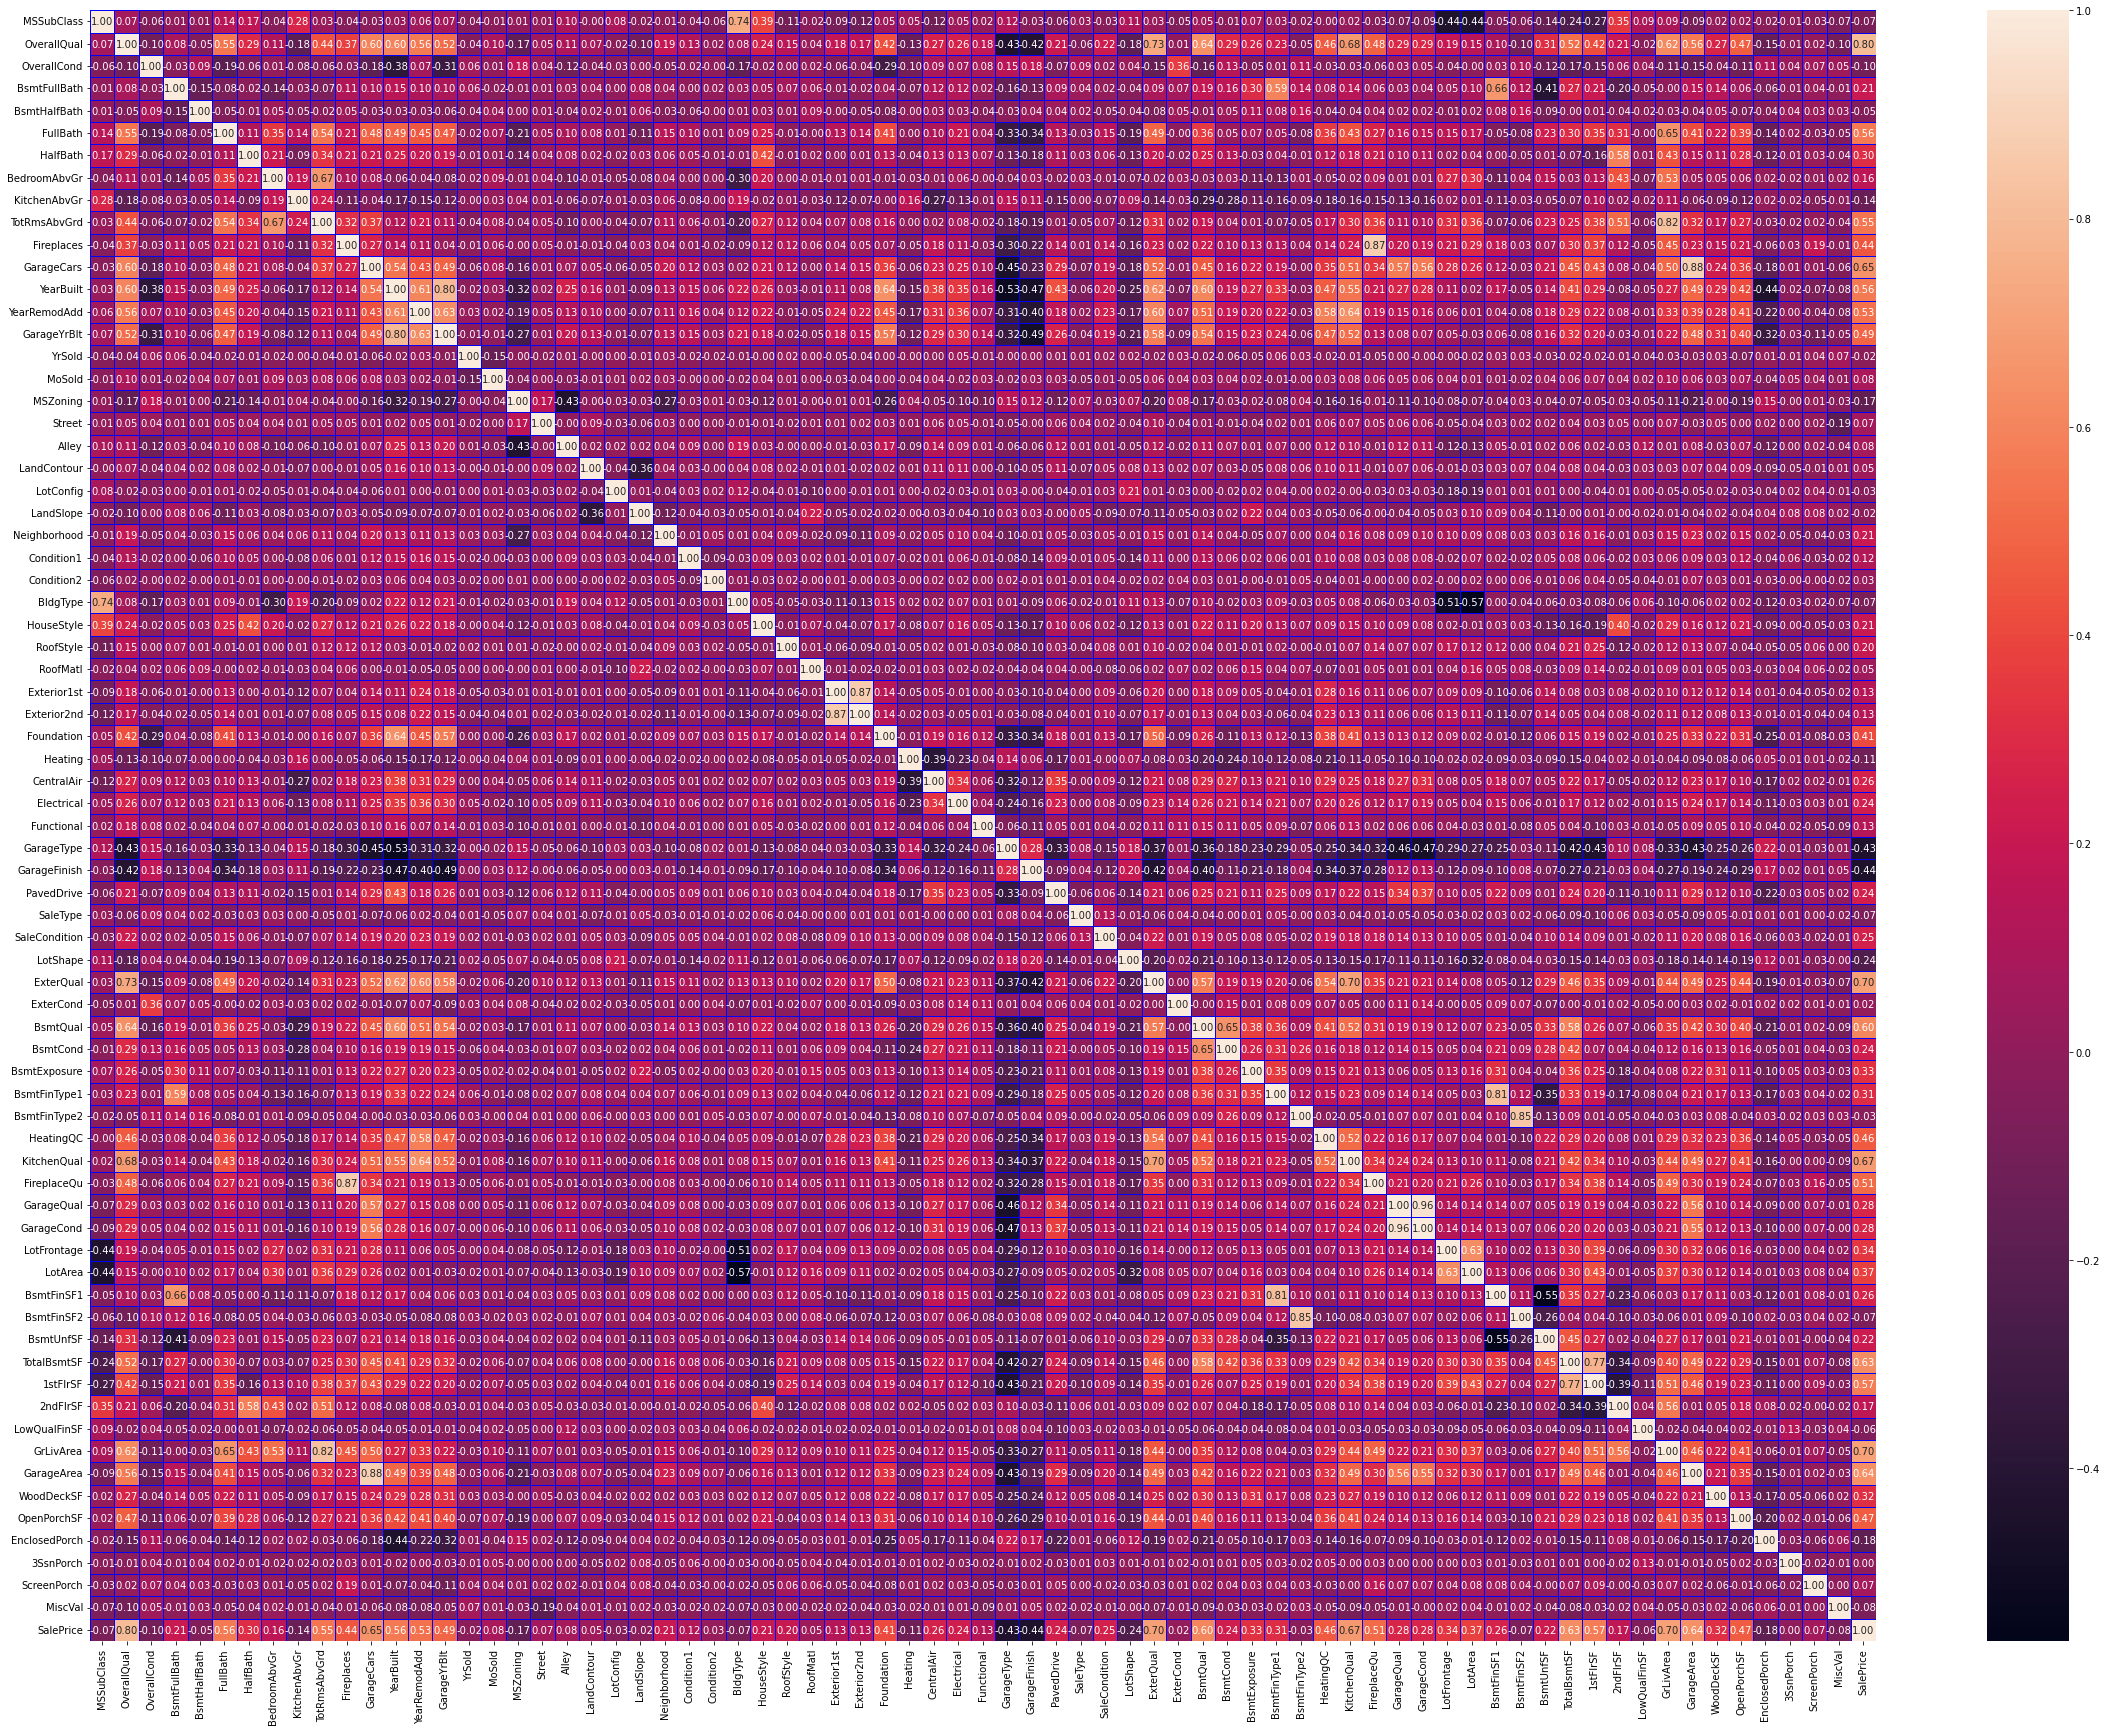

In [82]:
# Visualizing correlation
plt.figure(figsize=(40,30))
sns.heatmap(dff.corr(),annot=True,linewidths=0.5,linecolor='b',fmt='.2f')

EnclosedPorch has good correlation with YearBuilt, GarageYrBlt. OpenPorchSF has good correlation with OverallQual, EnclosedPorch has good correlation with YearBuilt, GarageYrBlt. OpenPorchSF has good correlation with OverallQual, FullBath, HalfBath, GarageCars, YearBuilt, TotRmsAbvGrd, GarageYrBlt, ExterQual, BsmtQual,GarageArea.

MSSubClass


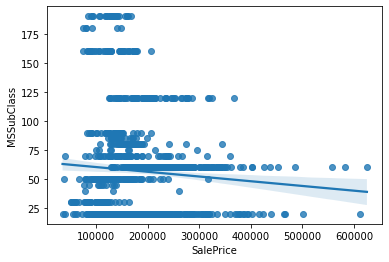

OverallQual


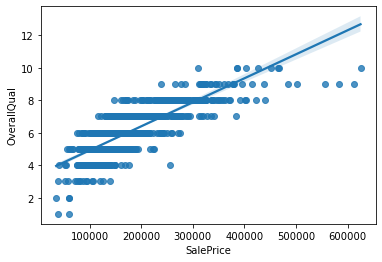

OverallCond


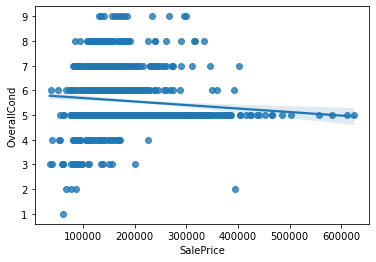

BsmtFullBath


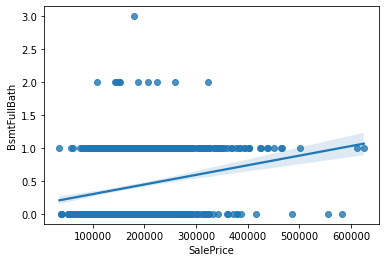

BsmtHalfBath


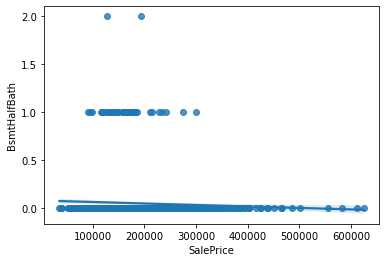

FullBath


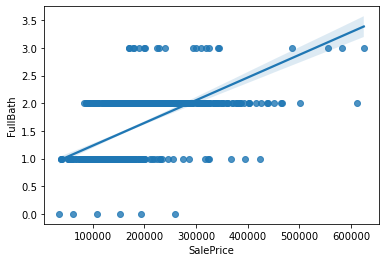

HalfBath


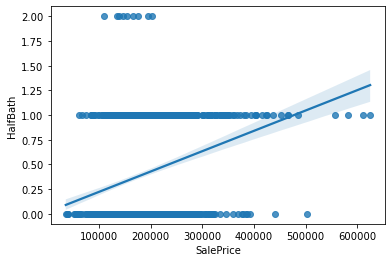

BedroomAbvGr


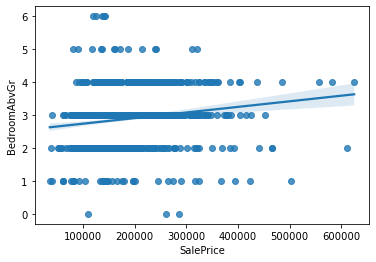

KitchenAbvGr


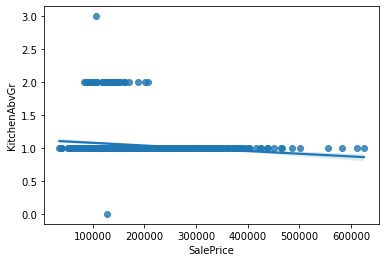

TotRmsAbvGrd


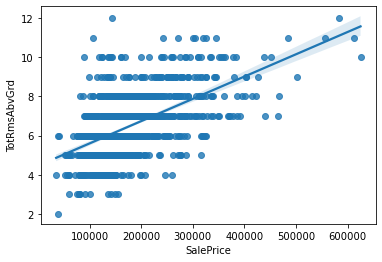

Fireplaces


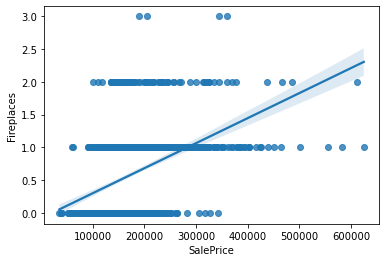

GarageCars


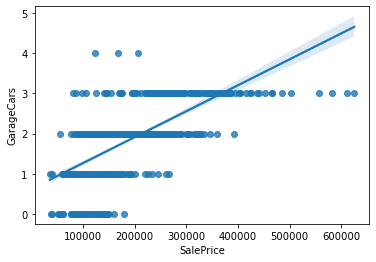

YearBuilt


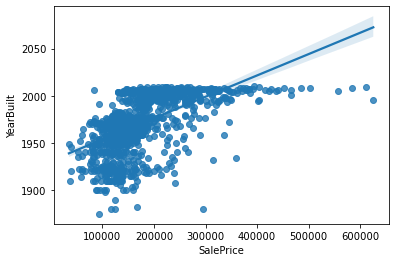

YearRemodAdd


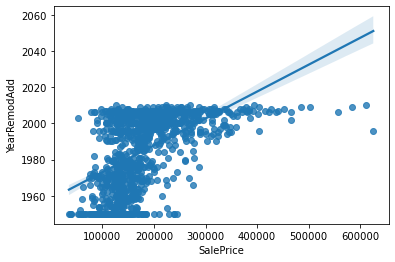

GarageYrBlt


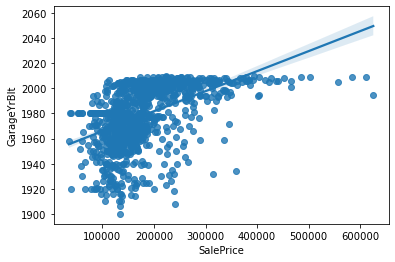

YrSold


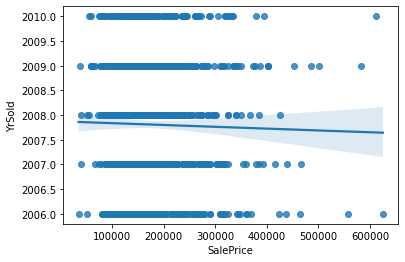

MoSold


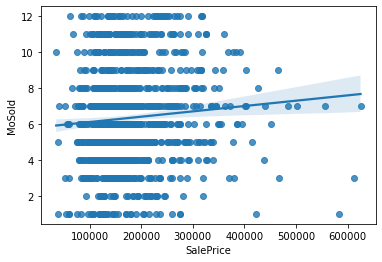

MSZoning


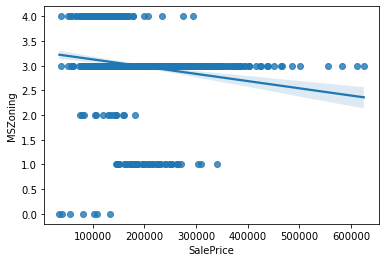

Street


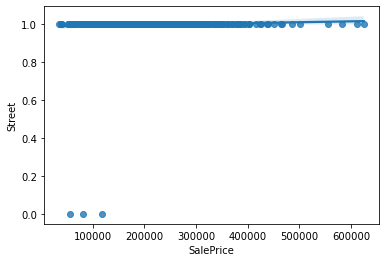

Alley


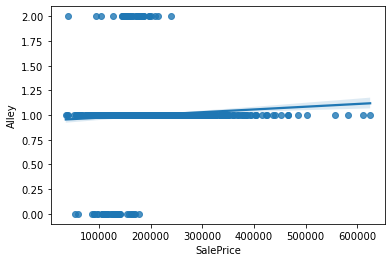

LandContour


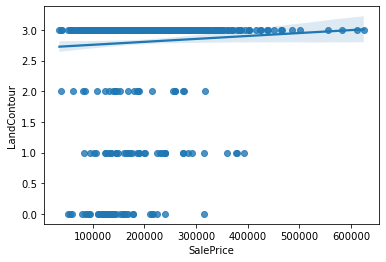

LotConfig


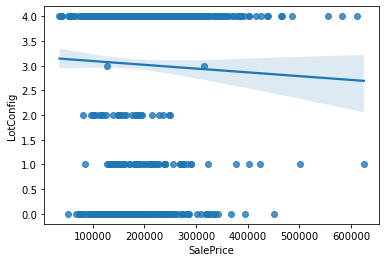

LandSlope


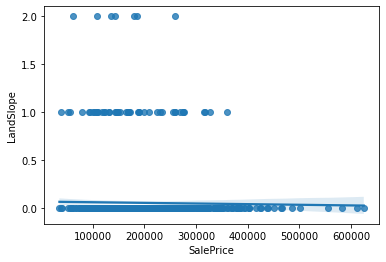

Neighborhood


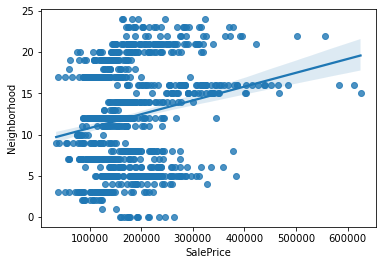

Condition1


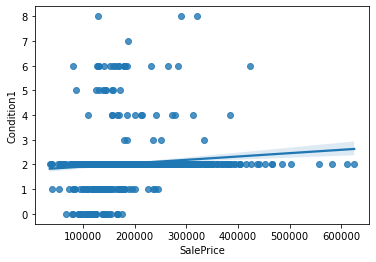

Condition2


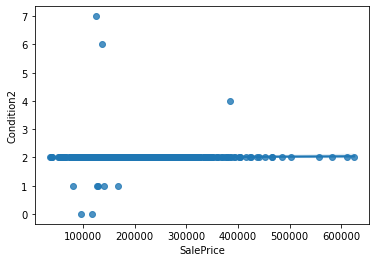

BldgType


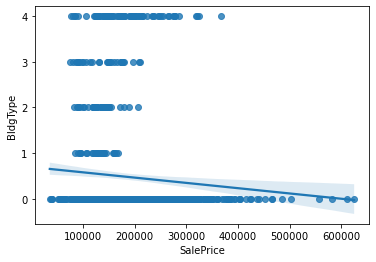

HouseStyle


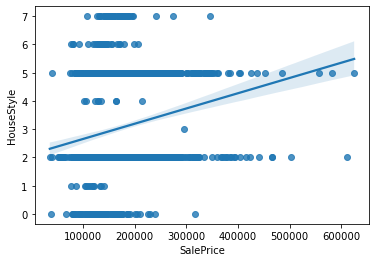

RoofStyle


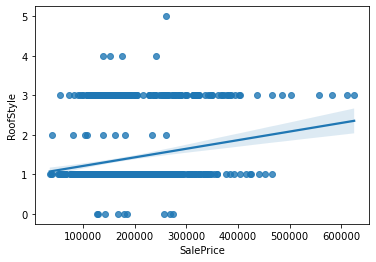

RoofMatl


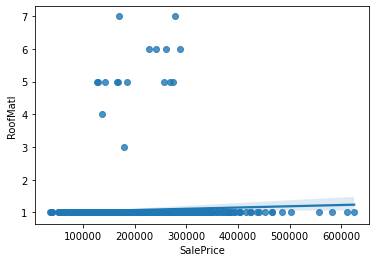

Exterior1st


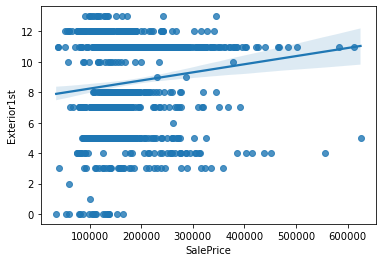

Exterior2nd


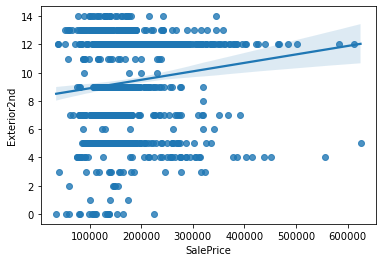

Foundation


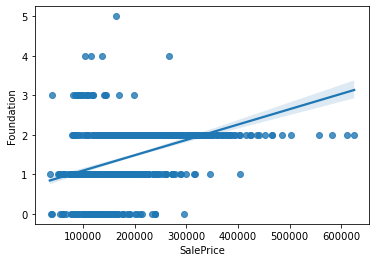

Heating


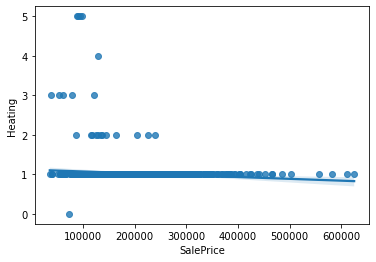

CentralAir


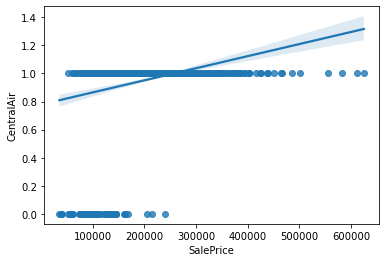

Electrical


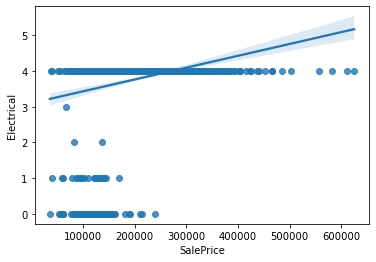

Functional


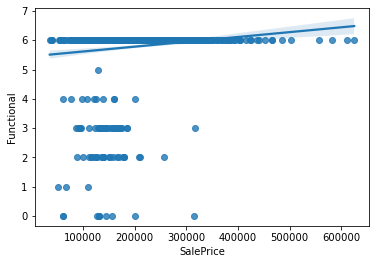

GarageType


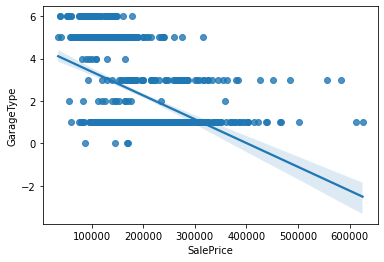

GarageFinish


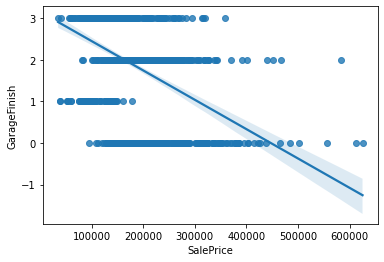

PavedDrive


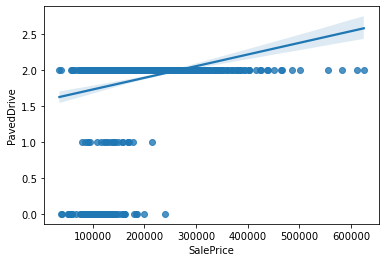

SaleType


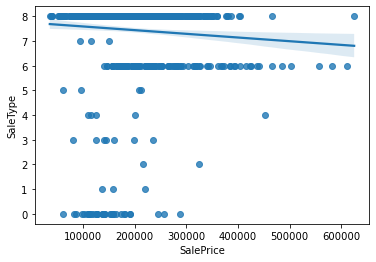

SaleCondition


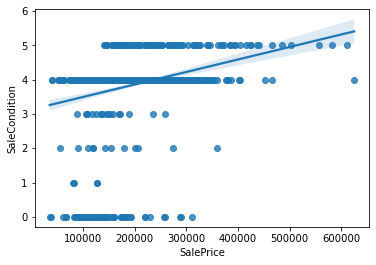

LotShape


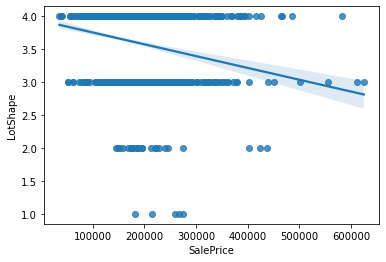

ExterQual


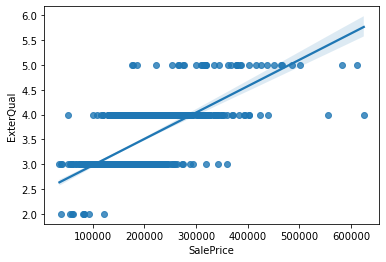

ExterCond


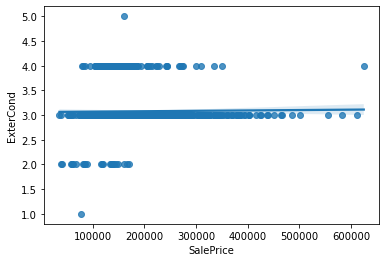

BsmtQual


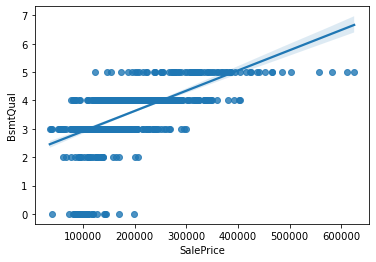

BsmtCond


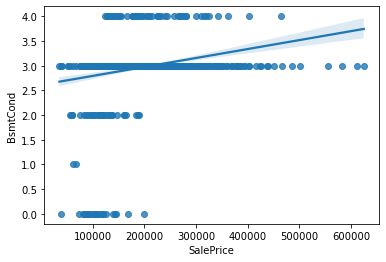

BsmtExposure


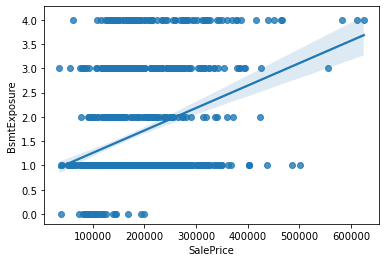

BsmtFinType1


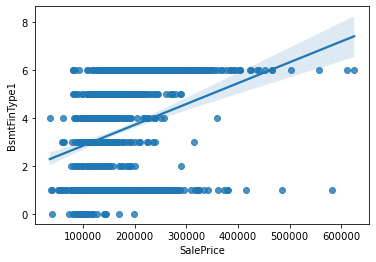

BsmtFinType2


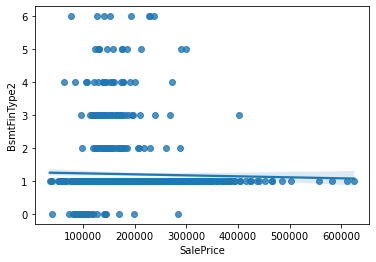

HeatingQC


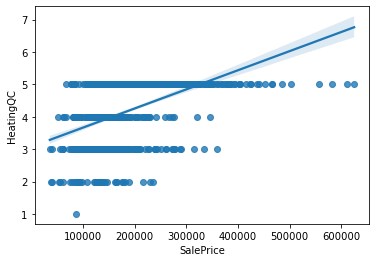

KitchenQual


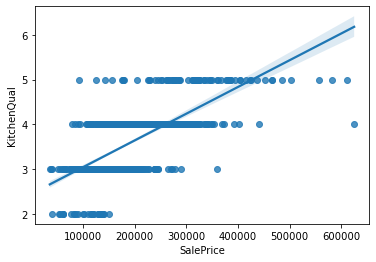

FireplaceQu


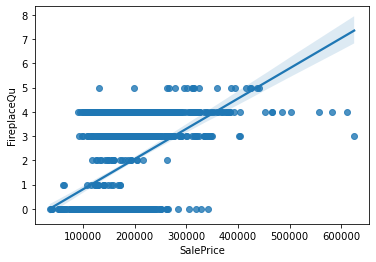

GarageQual


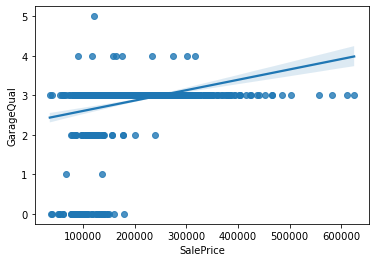

GarageCond


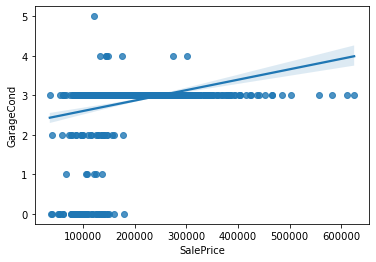

LotFrontage


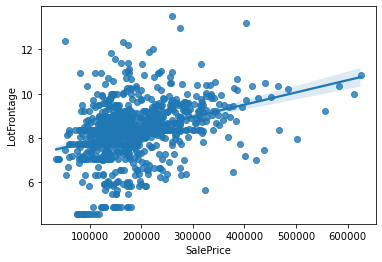

LotArea


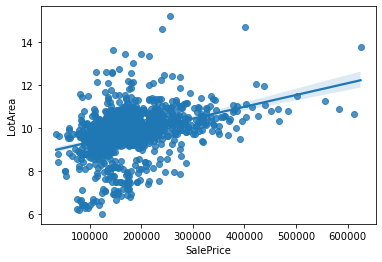

BsmtFinSF1


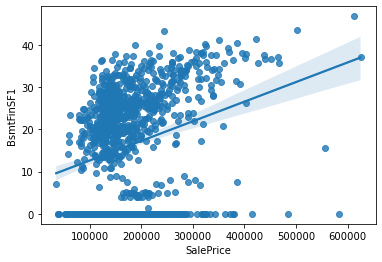

BsmtFinSF2


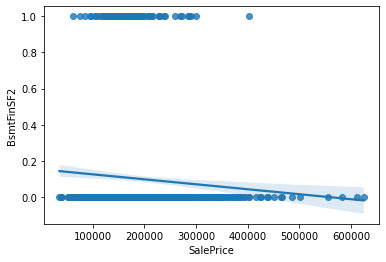

BsmtUnfSF


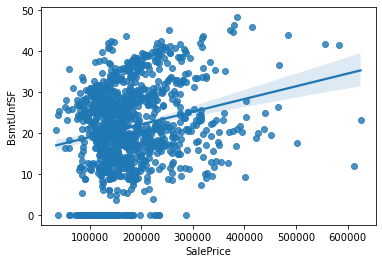

TotalBsmtSF


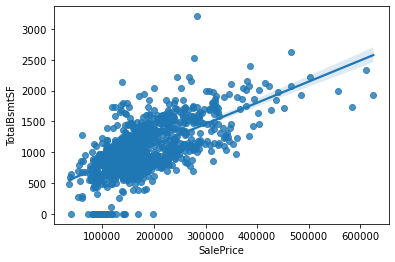

1stFlrSF


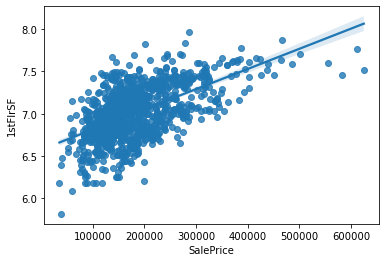

2ndFlrSF


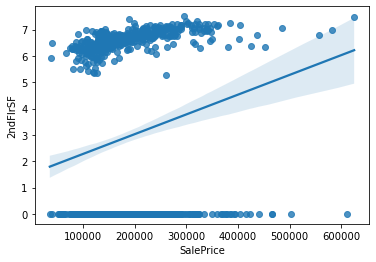

LowQualFinSF


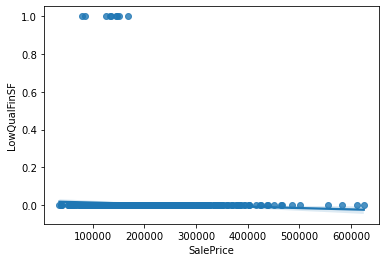

GrLivArea


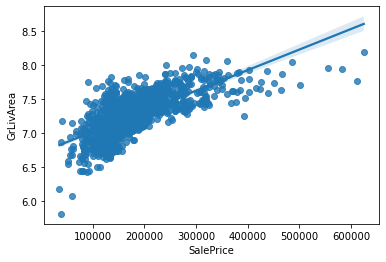

GarageArea


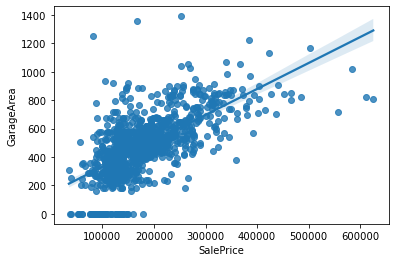

WoodDeckSF


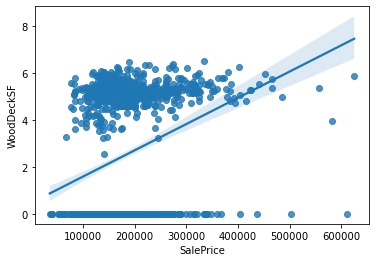

OpenPorchSF


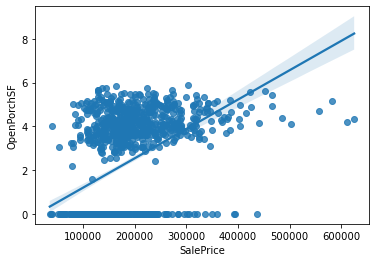

EnclosedPorch


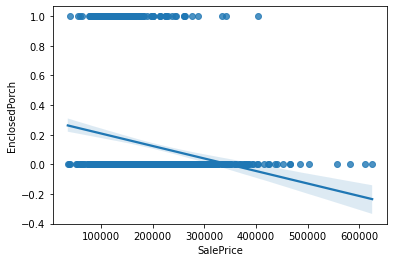

3SsnPorch


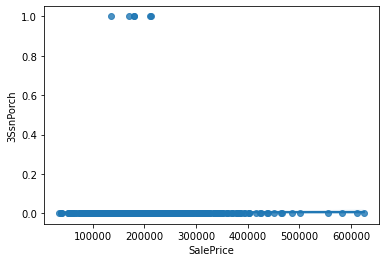

ScreenPorch


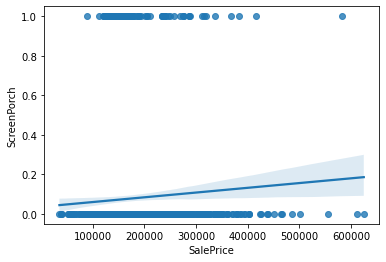

MiscVal


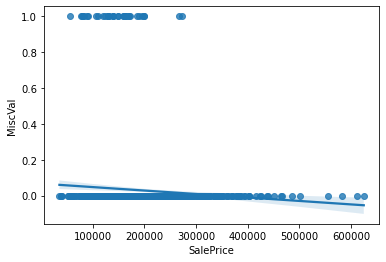

SalePrice


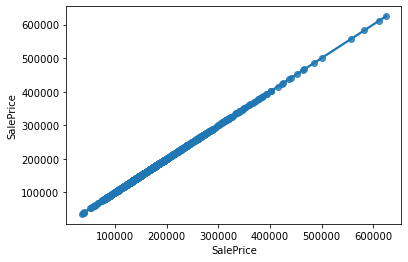

In [86]:
# Visualizing with regression plot
for i in dff.columns :
    print(i)
    sns.regplot(dff['SalePrice'],dff[i])
    plt.show()

Target column 'SalePrice' has strong positive linear correlation with OverallQual, FullBath, TotRmsAbvGrd, Fireplaces, GarageCars, YearBuilt, YearRemodAdd, GarageYrBlt, Foundation, BsmtQual, HeatingQC, KitchenQual, FireplaceQu, TotalBsmtSF, 1stFlrSF, GrLivArea, GarageArea, OpenPorchSF and has strong negative linear correlation with GarageType, GarageFinish.

SalePrice has good linear correlation with HalfBath, BsmtExposure, BsmtFinType1, WoodDeckSF.

<AxesSubplot:xlabel='Fireplaces', ylabel='FireplaceQu'>

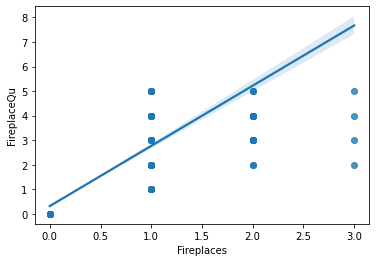

In [89]:
sns.regplot(dff['Fireplaces'],dff['FireplaceQu'])

Fireplaces and FireplaceQu are strong positively correlated.

<AxesSubplot:xlabel='Foundation', ylabel='GarageYrBlt'>

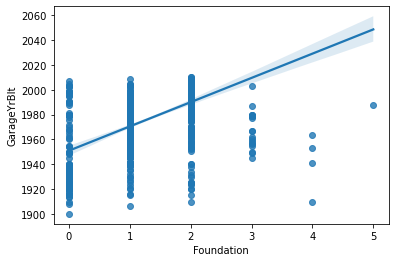

In [93]:
sns.regplot(dff['Foundation'],dff['GarageYrBlt'])

Foundation is highly correlated with GarageYrBlt. 

### Dividing dataset in x and y

In [68]:
x=dff.drop('SalePrice',axis=1)
x.head()

MSSubClass  OverallQual  OverallCond  BsmtFullBath  BsmtHalfBath  FullBath  \
0         120            6            5             0             0         2   
1          20            8            6             1             0         2   
2          60            7            5             1             0         2   
3          20            6            6             0             0         2   
4          20            6            7             0             1         2   

   HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  ...  2ndFlrSF  \
0         0             2             1             5  ...  0.000000   
1         0             4             1             8  ...  0.000000   
2         1             3             1             8  ...  6.787845   
3         0             3             1             7  ...  0.000000   
4         0             3             1             8  ...  0.000000   

   LowQualFinSF  GrLivArea  GarageArea  WoodDeckSF  OpenPorchSF  \
0           0.0   6.865891       440.0    0.000000     5.327876   
1           0.0   7.704361       621.0    4.406719     5.337538   
2           0.0   7.607878       455.0    5.198497     4.875197   
3           0.0   7.520235       546.0    0.000000     4.812184   
4           0.0   7.379632       529.0    5.484797     0.000000   

   EnclosedPorch  3SsnPorch  ScreenPorch  MiscVal  
0            0.0        0.0     0.000000      0.0  
1            0.0        0.0     1.001212      0.0  
2            0.0        0.0     0.000000      0.0  
3            0.0        0.0     0.000000      0.0  
4            0.0        0.0     0.000000      0.0  

[5 rows x 72 columns]

In [69]:
y=dff['SalePrice']
y

0       128000
1       268000
2       269790
3       190000
4       215000
         ...  
1163    122000
1164    108000
1165    148500
1166     40000
1167    183200
Name: SalePrice, Length: 1102, dtype: int64

In [70]:
# Checking shapes of x and y 
print('Shape of x : ',x.shape)
print('Shape of y : ',y.shape)

Shape of x :  (1102, 72)
Shape of y :  (1102,)


### Multicollinearity with VIF

In [71]:
# Imporing required libraries
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [72]:
# Checking multicollinearity of every column
def calc_vif(x) :
    vif=pd.DataFrame()
    vif['Variables']=x.columns
    vif['VIF Factors']=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
    return vif

vif_=calc_vif(x)
vif_[:35]

Variables   VIF Factors
0     MSSubClass     15.800424
1    OverallQual     92.302029
2    OverallCond     54.519062
3   BsmtFullBath      3.919328
4   BsmtHalfBath      1.307214
5       FullBath     30.677938
6       HalfBath      3.970031
7   BedroomAbvGr     38.576030
8   KitchenAbvGr     46.180109
9   TotRmsAbvGrd     94.450208
10    Fireplaces      9.052861
11    GarageCars     41.078581
12     YearBuilt  38444.305364
13  YearRemodAdd  29311.047882
14   GarageYrBlt  28853.240932
15        YrSold  59209.078373
16        MoSold      7.220602
17      MSZoning     40.122942
18        Street    431.773771
19         Alley     23.400608
20   LandContour     24.045678
21     LotConfig      5.149455
22     LandSlope      1.498745
23  Neighborhood      6.598267
24    Condition1      8.025298
25    Condition2     83.561734
26      BldgType      6.091826
27    HouseStyle      9.119271
28     RoofStyle      4.919707
29      RoofMatl      5.876892
30   Exterior1st     39.629712
31   Exterior2nd     37.158982
32    Foundation     11.016713
33       Heating     16.434284
34    CentralAir     26.262768

In [73]:
# Drop highly collinear column
x1=x.drop('YrSold',axis=1)
vif_=calc_vif(x1)
vif_[:35]

Variables   VIF Factors
0     MSSubClass     15.702057
1    OverallQual     90.568433
2    OverallCond     54.140696
3   BsmtFullBath      3.916289
4   BsmtHalfBath      1.306614
5       FullBath     27.970179
6       HalfBath      3.766444
7   BedroomAbvGr     38.503157
8   KitchenAbvGr     46.180107
9   TotRmsAbvGrd     93.733875
10    Fireplaces      9.052364
11    GarageCars     40.921010
12     YearBuilt  29594.367808
13  YearRemodAdd  23360.215730
14   GarageYrBlt  26064.003180
15        MoSold      7.220497
16      MSZoning     39.927887
17        Street    429.668395
18         Alley     23.335608
19   LandContour     24.000595
20     LotConfig      5.144485
21     LandSlope      1.498734
22  Neighborhood      6.593626
23    Condition1      7.992957
24    Condition2     83.536151
25      BldgType      6.062766
26    HouseStyle      9.094771
27     RoofStyle      4.912457
28      RoofMatl      5.873475
29   Exterior1st     39.614709
30   Exterior2nd     37.151903
31    Foundation     10.136103
32       Heating     16.429177
33    CentralAir     25.522369
34    Electrical     18.707266

In [76]:
# Drop highly collinear column
x1=x1.drop('YearBuilt',axis=1)
vif_=calc_vif(x1)
vif_[:35]

Variables   VIF Factors
0     MSSubClass     15.501128
1    OverallQual     89.671619
2    OverallCond     48.581399
3   BsmtFullBath      3.916026
4   BsmtHalfBath      1.306474
5       FullBath     27.933680
6       HalfBath      3.729978
7   BedroomAbvGr     38.296372
8   KitchenAbvGr     46.152990
9   TotRmsAbvGrd     92.749896
10    Fireplaces      9.047801
11    GarageCars     40.915779
12  YearRemodAdd  19099.274546
13   GarageYrBlt  16149.047538
14        MoSold      7.216490
15      MSZoning     39.925764
16        Street    429.050483
17         Alley     23.233181
18   LandContour     23.982963
19     LotConfig      5.122808
20     LandSlope      1.496331
21  Neighborhood      6.569612
22    Condition1      7.985721
23    Condition2     83.061000
24      BldgType      6.002417
25    HouseStyle      8.914148
26     RoofStyle      4.910399
27      RoofMatl      5.872224
28   Exterior1st     39.601660
29   Exterior2nd     36.843568
30    Foundation      9.814080
31       Heating     16.424948
32    CentralAir     25.507040
33    Electrical     18.706158
34    Functional     44.491671

In [79]:
# Drop highly collinear column
#x1=x1.drop('YearRemodAdd',axis=1)
vif_=calc_vif(x1)
vif_[35:]

Variables   VIF Factors
35   GarageFinish      6.278708
36     PavedDrive     22.136712
37       SaleType     25.275745
38  SaleCondition     15.335529
39       LotShape     58.039287
40      ExterQual    122.782184
41      ExterCond    101.994942
42       BsmtQual     76.402770
43       BsmtCond     79.144101
44   BsmtExposure      6.090673
45   BsmtFinType1     17.550136
46   BsmtFinType2     14.141277
47      HeatingQC     36.495934
48    KitchenQual     76.113612
49    FireplaceQu     10.047556
50     GarageQual    257.244725
51     GarageCond    265.294309
52    LotFrontage    106.148258
53        LotArea    220.843201
54     BsmtFinSF1     30.352009
55     BsmtFinSF2      5.543641
56      BsmtUnfSF     45.735104
57    TotalBsmtSF     88.663178
58       1stFlrSF   9863.368454
59       2ndFlrSF     35.406398
60   LowQualFinSF      1.162241
61      GrLivArea  14615.627677
62     GarageArea     34.663636
63     WoodDeckSF      2.611764
64    OpenPorchSF      3.398682
65  EnclosedPorch      1.512146
66      3SsnPorch      1.085126
67    ScreenPorch      1.216635
68        MiscVal      1.148707

In dataset, among multicolinear columns the features that are contributing less to the output variable can be dropped. We can drop 1-2 columns showing high colinearity but not all as it impacts the output.

Machine learning needs refined dataset. It needs only those columns that are highly contributing to the output. Clean data for which EDA is used. This is for better learning and prediction of data by models.

Once refining is done we'll do Standard Scaler to make all data scaled to mean=0 and std.dev.=+-1, so that prediction could be nearby.

### Scaling : Standard Scaler / Min-Max Scaler

In [80]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
xs=sc.fit_transform(x1)
x2=pd.DataFrame(xs,columns=x1.columns)
x2

MSSubClass  OverallQual  OverallCond  BsmtFullBath  BsmtHalfBath  \
0       1.491531    -0.054918    -0.520262     -0.805116     -0.229753   
1      -0.880112     1.403384     0.378372      1.132085     -0.229753   
2       0.068545     0.674233    -0.520262      1.132085     -0.229753   
3      -0.880112    -0.054918     0.378372     -0.805116     -0.229753   
4      -0.880112    -0.054918     1.277007     -0.805116      4.061565   
...          ...          ...          ...           ...           ...   
1097   -0.880112    -0.784069    -0.520262     -0.805116     -0.229753   
1098   -0.880112    -1.513220    -0.520262     -0.805116     -0.229753   
1099    2.440188    -0.054918     0.378372     -0.805116     -0.229753   
1100    0.305709    -1.513220    -1.418897     -0.805116     -0.229753   
1101    0.068545    -0.054918    -0.520262      1.132085     -0.229753   

      FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  ...  \
0     0.815833 -0.766343     -1.101448      -0.21175     -0.972849  ...   
1     0.815833 -0.766343      1.422036      -0.21175      0.975206  ...   
2     0.815833  1.220740      0.160294      -0.21175      0.975206  ...   
3     0.815833 -0.766343      0.160294      -0.21175      0.325854  ...   
4     0.815833 -0.766343      0.160294      -0.21175      0.975206  ...   
...        ...       ...           ...           ...           ...  ...   
1097 -1.022711 -0.766343      0.160294      -0.21175     -0.972849  ...   
1098  0.815833 -0.766343     -1.101448      -0.21175     -0.972849  ...   
1099  0.815833  1.220740      0.160294      -0.21175      0.325854  ...   
1100 -1.022711 -0.766343      0.160294      -0.21175     -0.323497  ...   
1101  0.815833  1.220740      0.160294      -0.21175      0.325854  ...   

      2ndFlrSF  LowQualFinSF  GrLivArea  GarageArea  WoodDeckSF  OpenPorchSF  \
0    -0.872997     -0.090743  -1.231457   -0.162762   -0.953368     1.431346   
1    -0.872997     -0.090743   1.387796    0.691914    0.745261     1.435849   
2     1.191983     -0.090743   1.086397   -0.091933    1.050463     1.220404   
3    -0.872997     -0.090743   0.812613    0.337767   -0.953368     1.191041   
4    -0.872997     -0.090743   0.373392    0.257493    1.160821    -1.051374   
...        ...           ...        ...         ...         ...          ...   
1097 -0.872997     -0.090743  -1.426340   -0.918278   -0.953368    -1.051374   
1098 -0.872997     -0.090743  -0.727194    0.214995   -0.953368     1.080381   
1099  1.074072     -0.090743   0.075073   -0.162762    0.772482    -1.051374   
1100  1.106175     -0.090743  -0.238137   -1.059937   -0.953368     0.815991   
1101  1.121256     -0.090743   0.186688   -0.384695    0.825592     0.966691   

      EnclosedPorch  3SsnPorch  ScreenPorch   MiscVal  
0         -0.406085   -0.07399     -0.29277 -0.181114  
1         -0.406085   -0.07399      3.41587 -0.181114  
2         -0.406085   -0.07399     -0.29277 -0.181114  
3         -0.406085   -0.07399     -0.29277 -0.181114  
4         -0.406085   -0.07399     -0.29277 -0.181114  
...             ...        ...          ...       ...  
1097      -0.406085   -0.07399     -0.29277 -0.181114  
1098      -0.406085   -0.07399     -0.29277 -0.181114  
1099      -0.406085   -0.07399     -0.29277 -0.181114  
1100       2.462669   -0.07399     -0.29277 -0.181114  
1101      -0.406085   -0.07399     -0.29277 -0.181114  

[1102 rows x 69 columns]

### Find best random state for Train-Test Split

In [81]:
#Importing required libraries
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

import time

In [82]:
#Finding out the best random state

maxAcc=0
rs=0
for i in range(0,100) :
    x_train,x_test,y_train,y_test=train_test_split(x2,y,test_size=0.3,random_state=i)
    
    lr=LinearRegression()
    lr.fit(x_train,y_train)
    predtrain=lr.predict(x_train)
    predtest=lr.predict(x_test)
    acctrain=r2_score(y_train,predtrain)
    acctest=r2_score(y_test,predtest)
    #if round(acctrain,2)==round(acctest,2) :
    #    print('Best random state : ',i,' Accuracy(Training) : ',acctrain*100,' Accuracy(Testing) : ',acctest*100)
        
    if acctest>maxAcc :
        maxAcc=acctest
        rs=i      
print('Random state with maximum accuracy : ',rs,' Accuracy(Training) : ',acctrain*100,' Accuracy(Testing) : ',maxAcc*100)

Random state with maximum accuracy :  0  Accuracy(Training) :  89.03072111837422  Accuracy(Testing) :  89.10520427685388


Looking at the training & testing accuracies, lets take 0 as our best random state.

In [83]:
# train-test split with best randon state and finding the train and test set shape after splittng
x_train,x_test,y_train,y_test=train_test_split(x2,y,test_size=0.3,random_state=0)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(771, 69)
(331, 69)
(771,)
(331,)


### Finding the best algorithm

In [84]:
# Making instance of regressors
lr=LinearRegression()
dtr=DecisionTreeRegressor()
svr=SVR()
knn=KNeighborsRegressor()
rf=RandomForestRegressor()
xg=GradientBoostingRegressor()

In [88]:
#Executing all algorithms in a single for loop

algo_list=[lr,dtr,knn,rf,xg]
svr_kernel=['rbf','poly','linear']
#Acc=0
#kv=''
for i in algo_list :    
    #if i==svr :
    #    for j in svr_kernel :
    #        svr=SVR(kernel=j)
    #        svr.fit(x_train,y_train)
    #        pred=svr.predict(x_test)
    #        acc=r2_score(y_test,pred)
    #        if acc>Acc :
    #            Acc=acc
    #            kv=j
    #    svr1=SVR(kernel=j)
    #    print(svr1)
    #    svr1.fit(x_train,y_train)
    #    predtrain=svr1.predict(x_train)
    #    predtest=svr1.predict(x_test)
    #    acctrain=r2_score(y_train,predtrain)
    #    acctest=r2_score(y_test,predtest)
    #    err1=mean_absolute_error(y_test,predtest)
    #    err2=mean_squared_error(y_test,predtest)
        
    print(i)
    i.fit(x_train,y_train)
    predtrain=i.predict(x_train)
    predtest=i.predict(x_test)
    acctrain=r2_score(y_train,predtrain)
    acctest=r2_score(y_test,predtest)
    err1=mean_absolute_error(y_test,predtest)
    err2=mean_squared_error(y_test,predtest)
    
    print('Accuracy(Training) : ',acctrain*100,' Accuracy(Test) ',acctest*100)
    print('mean_absolute_error',mean_absolute_error(y_test,predtest))
    print('mean_squared_error',mean_squared_error(y_test,predtest))
    print('\n')

LinearRegression()
Accuracy(Training) :  86.84477930437464  Accuracy(Test)  89.10520427685388
mean_absolute_error 18075.463027667374
mean_squared_error 647441777.9052033


DecisionTreeRegressor()
Accuracy(Training) :  100.0  Accuracy(Test)  75.7978512082764
mean_absolute_error 24938.776435045318
mean_squared_error 1438253882.039275


KNeighborsRegressor()
Accuracy(Training) :  86.47201535894533  Accuracy(Test)  85.75954242215478
mean_absolute_error 20954.74259818731
mean_squared_error 846263427.6653776


RandomForestRegressor()
Accuracy(Training) :  98.06050817030099  Accuracy(Test)  89.58443489961705
mean_absolute_error 17007.804561933535
mean_squared_error 618962682.5359138


GradientBoostingRegressor()
Accuracy(Training) :  97.33779985832217  Accuracy(Test)  91.64451999248149
mean_absolute_error 15896.000258603215
mean_squared_error 496538619.7949743




RandomForestRegressor has the highest accuracy but let's go for cross validation for all the models used.

In [90]:
# Computing cross validation score of all the models used
from sklearn.model_selection import cross_val_score

for i in algo_list :
    print('CV mean of ',i,' is ',np.abs(cross_val_score(i,x2,y,cv=7).mean()*100))

CV mean of  LinearRegression()  is  85.8374622653784
CV mean of  DecisionTreeRegressor()  is  72.69230684434298
CV mean of  KNeighborsRegressor()  is  83.24220589982089
CV mean of  RandomForestRegressor()  is  87.3679210651431
CV mean of  GradientBoostingRegressor()  is  89.05638575499157


Looking at difference of accuracy and cv mean, LinearRegression, RandomForestRegressor and GradientBoostingRegressor are showing good accuracy and almost similar difference between accuracy and cv mean.

### Hyperparameter Tuning

In [81]:
# Using hyper parameter tuning on selected model for better accuracy and to avoid overfitting issues
from sklearn.model_selection import GridSearchCV

parameters = {'fit_intercept':[True,False],
              'normalize':[True,False],
              'copy_X':[True,False],
              'n_jobs':[None,-1,1,2,5],
              'positive':[True,False]}
              
lr=LinearRegression()
GCV=GridSearchCV(lr,parameters,cv=7)
GCV.fit(x_train,y_train)
GCV.best_params_

{'copy_X': True,
 'fit_intercept': True,
 'n_jobs': None,
 'normalize': True,
 'positive': False}

In [91]:
lr=LinearRegression(copy_X=True,fit_intercept=True,n_jobs=None,normalize=False,positive=False)
lr.fit(x_train,y_train)
pred=lr.predict(x_test)
acc=r2_score(y_test,pred)
cv=cross_val_score(lr,x2,y,cv=7).mean()

print('Accuracy : ',acc,' CV mean : ',cv)

Accuracy :  0.8910520427685388  CV mean :  0.8583746226537841


In [86]:
# Using hyper parameter tuning on selected model for better accuracy and to avoid overfitting issues
from sklearn.model_selection import GridSearchCV

parameters = {'n_estimators':[10,50,100],
              'criterion':['squared_error','absolute_error','poisson'],
              'max_features':['auto','sqrt','log2'],
              'max_depth':[None,1,2,3]}
              
rf=RandomForestRegressor()
GCV=GridSearchCV(rf,parameters,cv=7)
GCV.fit(x_train,y_train)
GCV.best_params_

{'criterion': 'poisson',
 'max_depth': None,
 'max_features': 'log2',
 'n_estimators': 100}

Using hyper parameter tuning for better accuracy and to avoid overfitting issues with best parameters on selected model.

In [92]:
from sklearn.model_selection import cross_val_score

rf=RandomForestRegressor(criterion='poisson',max_depth=None,max_features='log2',n_estimators=100)
rf.fit(x_train,y_train)
pred=rf.predict(x_test)
acc=r2_score(y_test,pred)
cv=cross_val_score(rf,x2,y,cv=7).mean()

print('Accuracy : ',acc,' CV mean : ',cv)

Accuracy :  0.8049871424184172  CV mean :  0.7848094228731274


In [89]:
# Using hyper parameter tuning on selected model for better accuracy and to avoid overfitting issues

parameters = {#'loss':['squared_error', 'absolute_error', 'huber', 'quantile'],
              'criterion':['friedman_mse', 'squared_error', 'mse', 'mae'],
              'max_features':['auto','sqrt','log2',None],
              'max_depth':[None,3,5,10]}
              
gb=GradientBoostingRegressor()
GCV=GridSearchCV(gb,parameters,cv=7)
GCV.fit(x_train,y_train)
GCV.best_params_

{'criterion': 'mae', 'max_depth': 3, 'max_features': 'log2'}

In [96]:
# Using hyper parameter tuning on selected model for better accuracy and to avoid overfitting issues

parameters = {'loss':['squared_error', 'absolute_error', 'huber', 'quantile'],
              'criterion':['friedman_mse', 'squared_error', 'mse', 'mae'],
              'max_features':['auto','sqrt','log2',None],
              'max_depth':[None,3,5,10]}
              
gb=GradientBoostingRegressor()
GCV=GridSearchCV(gb,parameters,cv=7)
GCV.fit(x_train,y_train)
GCV.best_params_

{'criterion': 'mse', 'loss': 'huber', 'max_depth': 3, 'max_features': 'sqrt'}

In [93]:
gb=GradientBoostingRegressor(criterion='mae',max_depth=3,max_features='log2')
gb.fit(x_train,y_train)
pred=gb.predict(x_test)
acc=r2_score(y_test,pred)
cv=cross_val_score(gb,x2,y,cv=7).mean()

print('Accuracy : ',acc,' CV mean : ',cv)

Accuracy :  0.9159722145447942  CV mean :  0.8935979364761242


#### We are getting model accuracy as approx 92% and cv mean as approx 89%, this shows our model is performing good.

### AUC-ROC Curve

AUC-ROC is not available for regression problems, because there is no cut-off value for this algorithm, and ROC AUC is only calculable in the case if the algorithm returns a continuous probability value (and only 1 value) for an unseen element.

### Saving the model

In [94]:
# Saved the model in .pkl file
import pickle #import joblib
file='house_price_prediction.pkl'
pickle.dump(gb,open(file,'wb'))

### Conclusion

In [95]:
# Loading the model for checking score on actual and predicted test sets
load_model=pickle.load(open(file,'rb'))
result=load_model.score(x_test,y_test)
result

0.9159722145447942

In [96]:
#Printing the shapes of test sets to make comparison dataframe
print(x_test.shape)
print(y_test.shape)

(331, 69)
(331,)


In [97]:
# Comparison dataframe having Original and Predicted values
actual=np.array(y_test)
predicted=np.array(gb.predict(x_test))
conclusion=pd.DataFrame({'Orignal':actual,'Predicted':predicted.astype(int)})
conclusion

Orignal  Predicted
0     280000     273342
1     176500     180543
2     105000     129302
3     262280     246695
4     184100     215682
..       ...        ...
326   124500     131335
327   174000     173482
328   116050     114976
329   193500     210710
330   141000     116652

[331 rows x 2 columns]